# Business Understanding

## Overview



The Paris Olympics is a global sporting event that has garnered significant attention and engagement across various social media platforms. Analyzing public sentiment regarding the Olympics can provide valuable insights into how athletes, countries and the overall event are perceived. This analysis can benefit sports organizations, media outlets, sponsors offering feedback on public perception, performance and engagement levels thus helping to tailor content and marketing strategies. Sentiment analysis can also benefit city officials to improve planning and address concerns such as health and sanitation.
The goal of this project is to perform a comprehensive sentiment analysis of social media content related to this year's Paris Olympics to understand public sentiment, identify emerging trends and provide a comprehensive understanding of how different aspects of the Olympics resonate with audiences worldwide.

## Problem Statement



The Paris Olympics is a high-profile event that generates a substantial volume of unstructured social media data that reflects public sentiment. The challenge lies in effectively analyzing this vast and diverse stream of data while also tackling challenges such as language differences, sentiment variations and contextual meanings in order to provide accurate and actionable insights.

## Proposed Solutions



1.	Use API access to collect data from major social media platforms and ensure compliance with platform policies and data protection regulations.
2.	Implement text normalization, tokenization and content filtering while utilizing language detection and translation tools for multilingual data handling.
3.	Employ advanced natural language processing models like BERT or GPT for sentiment classification incorporating sarcasm detection and contextual analysis for improved accuracy.
4.	Create an interactive dashboard using Tableau to display sentiment trends and insights with features for data filtering and exploring different aspects of the data.

## Objectives




### Main Objective
Develop a comprehensive social media sentiment analysis model that accurately captures and interprets public sentiment about the Paris Olympics from social media data.

### Specific Objectives
1.	To extract, preprocess and clean social media data from multiple platforms addressing quality issues and handling multilingual content related to the Paris Olympics.
2.	To develop and train advanced natural language processing models to accurately classify sentiments incorporating techniques to handle sarcasm and contextual nuances.
3.	To create interactive visualizations to display sentiment trends and key events providing actionable insights to stakeholders based on comprehensive analysis of public opinions.

## Success Metrics



- Accuracy – The proportion of correctly classified sentiments (positive, negative, neutral) out of all sentiments predicted by the model.
85% - 90%

- Precision -  The proportion of true positive sentiment predictions (correctly identified positive tweets) out of all predicted positives.
80% - 90% for both positive and negative sentiment classes.
75% - 85% for the neutral class.

- Recall - The proportion of true positive sentiment predictions out of all actual positives.
75% - 80% for all sentiment classes.

- F1 Score - The harmonic mean of Precision and Recall that provides a single metric that balances both precision and recall.
0.75 to 0.85

- Area Under the Curve - Receiver Operating Characteristic (AUC-ROC) - Measures how well a model distinguishes between classes. > 0.85

## Challenges


- Social media data is noisy and unstructured presenting challenges for accurate analysis.
- Distinguishing between positive, negative and neutral sentiments can be difficult especially when dealing with multilingual content thus affecting sentiment analysis accuracy
- The volume of social media posts and comments can be overwhelming particularly during major events like the Olympics. Managing and processing large volumes of real-time data necessitates efficient data handling and processing techniques.
- Interpreting context and sarcasm an extra layer of complexity as the sentiment expressed may not always align with the literal meaning of the words used. Social media content often includes informal language, slang and nuanced expressions that can skew sentiment analysis

## Conclusion



This sentiment analysis project aims to deliver a comprehensive understanding of public opinion about the Paris Olympics by leveraging social media data. By addressing the challenges of data quality, sentiment accuracy, multilingual content and implementing advanced NLP techniques, the project will provide actionable insights to the aforementioned stakeholders. Successful execution will enable better engagement strategies and enhance the overall experience of the Olympics for audiences worldwide.

## Data Understanding




### Data Sources
1.	APIs - Extract data from social media sites such as Twitter, Facebook and Instagram in the form of posts, tweets, comments and hashtags using their respective APIs.
The focus will be on posts mentioning Paris Olympics, relevant hashtags and location-based data.

2.	Web Scraping - Extract additional data from comments and discussions from news sites and sports forums such as ESPN and Sports Center

### Datasets



1.	Social media data in the form of tweets, facebook and Instagram posts and comments mentioning the Paris Olympics.
2.	News articles, comments and replies discussing the various aspects of the Olympics.

### Relevance of The Data



>The data sources and datasets identified for this project are highly relevant to analyzing public sentiment surrounding the Paris Olympics. Social media platforms like Twitter, Facebook and Instagram capture immediate reactions, discussions and emotional responses from a global audience thus providing a rich source of unfiltered public sentiment.
The inclusion of location-based data and relevant hashtags allows for more targeted analysis potentially revealing geographical trends and topic-specific sentiments. Complementing this with web scraping of news sites and sports forums like ESPN and Sports Center adds depth to the analysis by incorporating more structured discussions and content.
This combination of data sources offers a comprehensive view of public sentiment ranging from spontaneous reactions on social media to more considered opinions in news comment sections and sports forums.

In [162]:
# Download required NLTK data
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

#### Python Modules Importation

In [163]:
# import necessary modules
# manupulation
import nltk
import pandas as pd
import os
import numpy as np

# Plotting
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns

# Download required NLTK data
# nltk.download('stopwords')
# nltk.download('wordnet')
# nltk.download('averaged_perceptron_tagger')

# nltk
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.stem import WordNetLemmatizer


#### Combining CSV Files

In [164]:
# # Folder in which the csv files are found
# folder_path = 'X_data'

# # List of all the csv files found in the folder
# csv_files = [fil for fil in os.listdir(folder_path) if fil.endswith('.csv')]

# # Create an empty list to store DataFrames
# data_frames = []

# # Loop through the list of CSV files and read each one into a DataFrame
# for file in csv_files:
#     file_path = os.path.join(folder_path, file)
#     df = pd.read_csv(file_path)
#     data_frames.append(df)

# # Concatenate all DataFrames into one (stack vertically)
# merged_df = pd.concat(data_frames, ignore_index=True, sort=False)

# merged_df.info()

# # Save the concatenated DataFrame to a new CSV file
# new_df = '2024-olympics-sentiments.csv'
# merged_df.to_csv(new_df, index=False)
# # print(f'merged CSV file saved as {output_file}')



In [165]:
class DataUnderstanding():
    """Class that provides an understanding of a dataset"""

    def __init__(self, data=None):
        """Initialization"""
        self.df = data

    def load_data(self, path):
        """Load the data"""
        if self.df is None:
            self.df = pd.read_csv(path, encoding='latin-1')
        return self.df

    def understanding(self):
        """Provides insights into the dataset"""
        # Info
        print("INFO")
        print("-" * 4)
        self.df.info()

        # Shape
        print("\n\nSHAPE")
        print("-" * 5)
        print(f"Records in dataset: {self.df.shape[0]} with {self.df.shape[1]} columns.")

        # Columns
        print("\n\nCOLUMNS")
        print("-" * 6)
        print("Columns in the dataset are:")
        for idx in self.df.columns:
            print(f"- {idx}")

        # Unique Values
        print("\n\nUNIQUE VALUES")
        print("-" * 12)
        for col in self.df.columns:
            print(f"Column {col} has {self.df[col].nunique()} unique values")
            if self.df[col].nunique() < 12:
                print(f"Top unique values in {col} include:")
                for idx in self.df[col].value_counts().index:
                    print(f"- {idx}")
            print("")

        # Missing or Null Values
        print("\nMISSING VALUES")
        print("-" * 15)
        for col in self.df.columns:
            print(f"Column {col} has {self.df[col].isnull().sum()} missing values.")

        # Duplicate Values
        print("\n\nDUPLICATE VALUES")
        print("-" * 16)
        print(f"The dataset has {self.df.duplicated().sum()} duplicated records.")


In [166]:
# Create an instance of DataCleaning
data =  DataUnderstanding()

# Load the data (replace with your actual file path)
data_path = '2024-olympics-sentiments.csv'
df = data.load_data(data_path)
df

Category     Keyword                                       Web_Page_URL  \
0      TopPost  #paris2024  https://twitter.com/search?q=#paris2024&src=ty...   
1      TopPost  #paris2024  https://twitter.com/search?q=#paris2024&src=ty...   
2      TopPost  #paris2024  https://twitter.com/search?q=#paris2024&src=ty...   
3      TopPost  #paris2024  https://twitter.com/search?q=#paris2024&src=ty...   
4      TopPost  #paris2024  https://twitter.com/search?q=#paris2024&src=ty...   
...        ...         ...                                                ...   
53166  TopPost  #paris2024  https://twitter.com/search?q=#paris2024&src=ty...   
53167  TopPost  #paris2024  https://twitter.com/search?q=#paris2024&src=ty...   
53168  TopPost  #paris2024  https://twitter.com/search?q=#paris2024&src=ty...   
53169  TopPost  #paris2024  https://twitter.com/search?q=#paris2024&src=ty...   
53170  TopPost  #paris2024  https://twitter.com/search?q=#paris2024&src=ty...   

                                           Tweet_Website  \
0      https://twitter.com/usabasketball/status/18216...   
1      https://twitter.com/canlesofficial/status/1821...   
2      https://twitter.com/Olympics/status/1821643768...   
3      https://twitter.com/FIBA/status/18216605850475...   
4      https://twitter.com/WorldAthletics/status/1821...   
...                                                  ...   
53166  https://twitter.com/Linus2k/status/88563519166...   
53167  https://twitter.com/ambafrancejp_jp/status/885...   
53168  https://twitter.com/rubencronicas/status/88602...   
53169  https://twitter.com/marcos_z/status/8848591646...   
53170  https://twitter.com/vpecresse/status/884862216...   

                              Author_Name  \
0                          USA Basketball   
1                                  Canles   
2                 The Olympic GamesReload   
3                                    FIBA   
4                         World Athletics   
...                                   ...   
53166                        Doctor Linus   
53167               ãã©ã³ã¹å¤§ä½¿é¤¨   
53168                   RUBÃN HERNÃNDEZ   
53169      Marcos ZugastiReloadParis 2024   
53170  ValÃ©rie PÃ©cresseReloadParis 2024   

                       Author_Web_Page_URL Tweet_Timestamp  \
0        https://twitter.com/usabasketball      2024-08-08   
1       https://twitter.com/canlesofficial             NaN   
2             https://twitter.com/Olympics      2024-08-08   
3                 https://twitter.com/FIBA             NaN   
4       https://twitter.com/WorldAthletics      2024-08-08   
...                                    ...             ...   
53166          https://twitter.com/Linus2k      2017-07-13   
53167  https://twitter.com/ambafrancejp_jp      2017-07-14   
53168    https://twitter.com/rubencronicas      2017-07-15   
53169         https://twitter.com/marcos_z      2017-07-11   
53170        https://twitter.com/vpecresse      2017-07-11   

                                           Tweet_Content  \
0       Olympic Legends. #USABMNT #Paris2024 #Basketball   
1      We've created footwear that not only feels inc...   
2      #OLYMPICRECORD FOR RIZKI JUNIANSYAH! @iwfnet |...   
3      Everyone is watching the ball. Except for him....   
4      Men's javelin throw final was BIG  92.97m OR A...   
...                                                  ...   
53166  Il mio augurio Ã¨ che #Paris2024 sia un IMMENS...   
53167  ä»å¹´ããã©ã³ã¹å¤§ä½¿å
¬é¸ã«ã¦ããã...   
53168  #Paris2024 @ClubFrance @FranciaenMexico @MX_Fr...   
53169                    Bancando los trapos. #Paris2024   
53170  Paris et @iledefrance accueilleront les Jeux O...   

                                         Tweet_Image_URL  \
0      https://pbs.twimg.com/media/GUfcvY8bYAA0fD6?fo...   
1                                                    NaN   
2                                                    NaN   
3      https://pbs.twimg.com/media/GUfWSPCXcAAWmGV?fo...   
4    

In [167]:

# Get an understanding of the dataset
data.understanding()

INFO
----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53171 entries, 0 to 53170
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Category                  53171 non-null  object
 1   Keyword                   53171 non-null  object
 2   Web_Page_URL              53171 non-null  object
 3   Tweet_Website             53171 non-null  object
 4   Author_Name               53132 non-null  object
 5   Author_Web_Page_URL       53171 non-null  object
 6   Tweet_Timestamp           49848 non-null  object
 7   Tweet_Content             53153 non-null  object
 8   Tweet_Image_URL           25043 non-null  object
 9   Tweet_Video_URL           53171 non-null  object
 10  Tweet_AD                  53171 non-null  bool  
 11  Tweet_Number_of_Reviews   39908 non-null  object
 12  Tweet_Number_of_Retweets  45432 non-null  object
 13  Tweet_Number_of_Likes     50328 non-null  object
 14  Tweet_Number

The dataset has 24725 duplicated records which looks unrealistic.Lets look if the rows are with duplicates values

In [168]:
# Identify duplicated rows
duplicates = df[df.duplicated(keep=False)]  # keep=False marks all duplicates as True

# Print the duplicated rows
duplicates.iloc[4000:4010]
# len(duplicates)

Category         Keyword  \
4000  TopPost      #paris2024   
4001  TopPost      #paris2024   
4002  TopPost  #parisolympics   
4003  TopPost  #parisolympics   
4004  TopPost  #parisolympics   
4005  TopPost      #paris2024   
4006  TopPost      #paris2024   
4007  TopPost      #paris2024   
4008  TopPost      #paris2024   
4009  TopPost  #parisolympics   

                                           Web_Page_URL  \
4000  https://twitter.com/search?q=#paris2024&src=ty...   
4001  https://twitter.com/search?q=#paris2024&src=ty...   
4002  https://twitter.com/search?q=#parisolympics&sr...   
4003  https://twitter.com/search?q=#parisolympics&sr...   
4004  https://twitter.com/search?q=#parisolympics&sr...   
4005  https://twitter.com/search?q=#paris2024&src=ty...   
4006  https://twitter.com/search?q=#paris2024&src=ty...   
4007  https://twitter.com/search?q=#paris2024&src=ty...   
4008  https://twitter.com/search?q=#paris2024&src=ty...   
4009  https://twitter.com/search?q=#parisolympics&sr...   

                                          Tweet_Website  \
4000  https://twitter.com/karma_shopping/status/1821...   
4001  https://twitter.com/Olympics/status/1821504388...   
4002  https://twitter.com/NBCOlympics/status/1821628...   
4003  https://twitter.com/NBCOlympics/status/1821611...   
4004  https://twitter.com/TeamUSA/status/18216320135...   
4005  https://twitter.com/CMShehbaz/status/182163865...   
4006  https://twitter.com/SuperSportTV/status/182162...   
4007  https://twitter.com/FIBA/status/18216586312945...   
4008  https://twitter.com/Grayscale/status/177737811...   
4009  https://twitter.com/TeamUSA/status/18216394027...   

                                   Author_Name  \
4000                            Karma Shopping   
4001                   The Olympic GamesReload   
4002          NBC Olympics & ParalympicsReload   
4003          NBC Olympics & ParalympicsReload   
4004  Team USAReloadNBC Olympics & Paralympics   
4005                            Shehbaz Sharif   
4006                               SuperSport    
4007                                      FIBA   
4008                                 Grayscale   
4009                                  Team USA   

                     Author_Web_Page_URL Tweet_Timestamp  \
4000  https://twitter.com/karma_shopping             NaN   
4001        https://twitter.com/Olympics      2024-08-08   
4002     https://twitter.com/NBCOlympics      2024-08-08   
4003     https://twitter.com/NBCOlympics      2024-08-08   
4004         https://twitter.com/TeamUSA      2024-08-08   
4005       https://twitter.com/CMShehbaz      2024-08-08   
4006    https://twitter.com/SuperSportTV      2024-08-08   
4007            https://twitter.com/FIBA      2024-08-08   
4008       https://twitter.com/Grayscale             NaN   
4009         https://twitter.com/TeamUSA      2024-08-08   

                                          Tweet_Content  \
4000  Why Is Everyone Saving Big on Flights, And You...   
4001  #GOLD! Veddriq Leonardo clinches gold for Indo...   
4002  Noah Lyles provides an update on his condition...   
4003  That first Olympic final feeling for Nikki Hil...   
4004  WORLD RECORD 50.37 @GoSydGo is unstoppable in ...   
4005  Bravo Arshad  History made!Pakistanâs  first...   
4006  Letsile Tebogo, he did it for his mom, for his...   
4007  This is Avengers in real life.#Paris2024 x #Ba...   
4008  Diversified crypto exposure in a single fund a...   
4009  THESE ARE THE MOMENTS. OLYMPIC CHAMPION TARA D...   

                                        Tweet_Image_URL  \
4000  https://pbs.twimg.com/media/GUYQHooXAAA0DJU?fo...   
4001                                                NaN   
4002                                                NaN   
4003                                                NaN   
4004                                                NaN   
4005  https://pbs.twimg.com/media/GUfCrjDXMAAg0ZQ?fo...   
4006  https://pbs.twimg.com/media/GUey5NQX0AE2pQ6?fo...   
4007  h

In [169]:
# Checking duplicates based on specific columns
duplicates = df[df.duplicated(subset=['Tweet_Website'], keep=False)]
len(duplicates)


52572

In [170]:
import pandas as pd

# Assuming `df` is your DataFrame
# Dictionary to store the count of duplicate values per column
duplicates_per_column = {}

# Iterate over each column in the DataFrame
for column in df.columns:
    # Count the number of duplicate values in the column (excluding NaN)
    duplicate_count = df[column].duplicated(keep=False).sum()
    duplicates_per_column[column] = duplicate_count

# Convert the dictionary to a DataFrame for better readability
duplicates_df = pd.DataFrame(list(duplicates_per_column.items()), columns=['Column', 'Number of Duplicates'])

print(duplicates_df)


                      Column  Number of Duplicates
0                   Category                 53171
1                    Keyword                 53171
2               Web_Page_URL                 53171
3              Tweet_Website                 52572
4                Author_Name                 52789
5        Author_Web_Page_URL                 52915
6            Tweet_Timestamp                 53113
7              Tweet_Content                 52510
8            Tweet_Image_URL                 52917
9            Tweet_Video_URL                 52572
10                  Tweet_AD                 53171
11   Tweet_Number_of_Reviews                 53015
12  Tweet_Number_of_Retweets                 53152
13     Tweet_Number_of_Likes                 53119
14     Tweet_Number_of_Looks                 53062


After reviewing the dataset, I realized that these rows are not true duplicates. The rows have identical values in some columns, but not across all columns. This partial similarity led to their being incorrectly identified as duplicates.

## Data Cleaning

### Processes of Data Cleaning
- Dropping columns that are Irrelevant our analysis
- Removing duplicates
- Removing Null Values
- Stripping white spaces off the column names
- Convert the TweetTimestamp column into a datetime format

In [171]:
import pandas as pd

class DataCleaning(DataUnderstanding):
    """This class is used for data cleaning"""

    def drop_columns(self, columns):
        """Drop specified columns"""
        print(f"Dropping Columns: {columns}")
        self.df.drop(columns=columns, inplace=True)

    def drop_nulls(self):
        """Drop rows with any null values and print the number of rows dropped"""
        num_rows_before = self.df.shape[0]
        self.df.dropna(inplace=True)
        num_rows_after = self.df.shape[0]
        print(f"Number of rows with null values dropped: {num_rows_before - num_rows_after}")

    def strip_column_names(self):
        """Strip whitespace from column names"""
        print("Stripping whitespace from column names")
        self.df.columns = self.df.columns.str.strip()

    def convert_to_datetime(self, column_name):
        """Convert a column to datetime format"""
        self.df[column_name] = pd.to_datetime(self.df[column_name])

    def filter_year(self, column_name, year):
        """Filter rows based on a specific year"""
        self.df = self.df[self.df[column_name].dt.year == year]

# Create an instance of DataCleaning
cleaner = DataCleaning()

# Load the data (replace with your actual file path)
data_path = '2024-olympics-sentiments.csv'
df = cleaner.load_data(data_path)

# Perform data cleaning
# Drop irrelevant columns
irrelevant_columns = ['Tweet_Image_URL', 'Web_Page_URL', 'Author_Web_Page_URL', 'Author_Name',
                      'Tweet_Video_URL', 'Tweet_AD', 'Tweet_Website']
cleaner.drop_columns(irrelevant_columns)

# Drop rows with null values and print the number removed
cleaner.drop_nulls()

# Strip column names of any leading/trailing whitespace
cleaner.strip_column_names()

# Convert 'Tweet_Timestamp' to datetime format
cleaner.convert_to_datetime('Tweet_Timestamp')

# Filter data for the year 2024
cleaner.filter_year('Tweet_Timestamp', 2024)

# Print the cleaned DataFrame
df = cleaner.df
print(df.head())


Dropping Columns: ['Tweet_Image_URL', 'Web_Page_URL', 'Author_Web_Page_URL', 'Author_Name', 'Tweet_Video_URL', 'Tweet_AD', 'Tweet_Website']
Number of rows with null values dropped: 20194
Stripping whitespace from column names
  Category         Keyword Tweet_Timestamp  \
0  TopPost      #paris2024      2024-08-08   
2  TopPost      #paris2024      2024-08-08   
4  TopPost      #paris2024      2024-08-08   
5  TopPost      #paris2024      2024-08-08   
6  TopPost  #parisolympics      2024-08-07   

                                       Tweet_Content Tweet_Number_of_Reviews  \
0   Olympic Legends. #USABMNT #Paris2024 #Basketball                     241   
2  #OLYMPICRECORD FOR RIZKI JUNIANSYAH! @iwfnet |...                     201   
4  Men's javelin throw final was BIG  92.97m OR A...                     133   
5  WHAT A TIME TO BE ALIVE.  #USABMNT #Paris2024 ...                     204   
6  Quincy Hallâs effort down the stretch to win...                     327   

  Tweet_Number_o

**Validity**

Irrelevant Data; data that is not actually needed, and doesn’t fit under the context of the problem we’re trying to solve

***Why columns the columns have been dropped***

- `Web_Page_URL`: Redundant with the Tweet_Website column, because it contains the same information.
- `Author_Web_Page_URL`: It would be useful if we would have wanted to understand the who is posting but our focus is in the sentimental analysis
- `Tweet_Image_URL`:Images are not essential for this analysis considering the column itself has 50% null values
- `Tweet_Video_URL`:video content is not essential for this analysis.
- `Tweet_AD`: This indicates whether the tweet is an ad, butwe are not analyzing advertisements
- `Tweet_Number_of_Reviews`: Has a lot of missing values


**Completeness**

Data completeness is the extent to which all required and expected data elements are present within a dataset, ensuring that no essential information is missing.It is crucial for accurate insights, as missing information can lead to incomplete analyses and flawed decision-making. Neglecting data completeness risks distorted conclusions and undermines the reliability of business strategies or research outcomes.

In [172]:
print(df.isna().sum().sum())


0


- Number of rows with null values dropped: 3665

**Consistency**

In [173]:
print(df.duplicated().sum())

15284


After reviewing the dataset, I realized that these rows are not true duplicates. The rows have identical values in some columns, but not across all columns. This partial similarity led to their being incorrectly identified as duplicates.

#### Changing DataTypes

In [174]:
# Convert engagement columns to numeric
def convert_value(value):
    try:
        if isinstance(value, str):
            if 'K' in value:
                value = float(value.replace('K', '')) * 1e3
            elif 'M' in value:
                value = float(value.replace('M', '')) * 1e6
        return float(value)
    except ValueError:
        return None

for column in ['Tweet_Number_of_Retweets', 'Tweet_Number_of_Likes', 'Tweet_Number_of_Looks']:
    df[column] = df[column].apply(convert_value)

In [175]:
# Convert engagement columns to numeric
numeric_columns = ['Tweet_Number_of_Retweets', 'Tweet_Number_of_Likes', 'Tweet_Number_of_Looks']
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')


Convert `Tweet_Timestamp` column into datetime format

In [176]:
df['Tweet_Timestamp'] = pd.to_datetime(df['Tweet_Timestamp'])

In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32550 entries, 0 to 53123
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Category                  32550 non-null  object        
 1   Keyword                   32550 non-null  object        
 2   Tweet_Timestamp           32550 non-null  datetime64[ns]
 3   Tweet_Content             32550 non-null  object        
 4   Tweet_Number_of_Reviews   32550 non-null  object        
 5   Tweet_Number_of_Retweets  32547 non-null  float64       
 6   Tweet_Number_of_Likes     32531 non-null  float64       
 7   Tweet_Number_of_Looks     32550 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 2.2+ MB


### Text Cleaning

Our data requires some preprocessing before we go on further with analysis and making the prediction model.

Hence in the Preprocessing phase we do the following in the order below:-
- Remove URLs
- Remove mentions
- Remove hashtags (keep the text after the #)
- Remove punctuation
- Tokenization
- Remove stopwords and Lemmatization
- Remove extra white spaces
- Remove numbers
- Filter tokens to retain only nouns, adjectives, verbs, and adverbs





**Text Visualization**

Text Visualization using word cloud to find the most used texts in the tweets

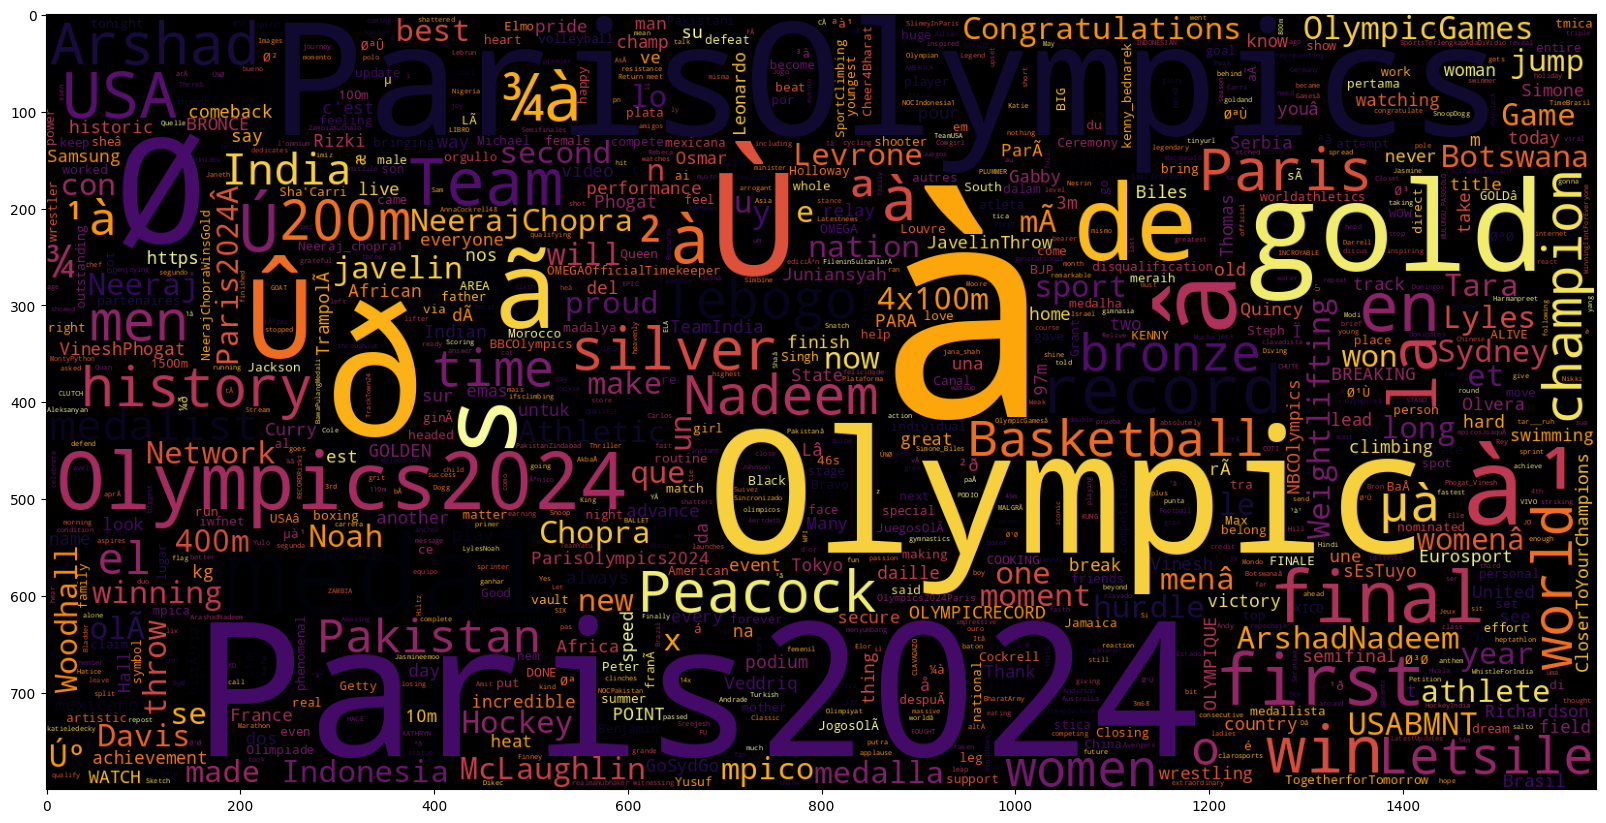

In [178]:
# ! pip install WordCloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Extract processed text from your DataFrame
processedtext = df['Tweet_Content'].tolist()

# Use all processed text (up to the length of your dataset)
data_neg = processedtext[:len(processedtext)]

plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False,colormap='inferno').generate(" ".join(data_neg))
plt.imshow(wc)
plt.show()

Some tweets seem corrupted, containing unusual or incorrect words, indicating potential data quality issues that need to be addressed for accurate analysis.

In [179]:
# A sample of a row with corrupted text
df['Tweet_Content'].iloc[10000]

'92.97= GOLDThis is perhaps the biggest individual achievement by a Pakistani athlete. The entire nation is proud of #ArshadNadeem. Thank you for representing our country the way u have, thank u for bringing hope. Champion of champions. #Paris2024 #PakistanZindabad'

**A function to remove corrupted Texts**

In [180]:
def remove_corrupted_text(text):
    """
    Remove corrupted text from the input string. This includes non-alphanumeric characters,
    repeated characters, and other irregularities.

    Returns:
    str: The cleaned string with corrupted text removed.
    """
    if not isinstance(text, str):
        # Handle non-string values, e.g., convert to string or skip
        return ''  # Or any suitable handling

    # Define a regular expression pattern to match corrupted words
    corrupted_word_pattern = re.compile(r'\b\w*[^a-zA-Z0-9\s,.!?\'"-]\w*\b|\b\w*(.)\1{2,}\w*\b')

    # Remove corrupted text
    cleaned_text = re.sub(corrupted_word_pattern, '', text)

    # Remove extra white spaces
    cleaned_text = re.sub(r'\s+', ' ', cleaned_text).strip()

    return cleaned_text

**A function for Text Cleaning**

In [181]:
# Initialize stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def lemmatize_tweet(text):
    # Remove corrupted text
    text = remove_corrupted_text(text)

    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove mentions
    text = re.sub(r'@\w+', '', text)
    # Remove hashtags (keep the text after the #)
    text = re.sub(r'#', '', text)
    # Remove special characters like "&quot;"
    text = re.sub(r'&\w+;', '', text)
    # Remove punctuation
    text = "".join([char for char in text if char not in string.punctuation])
    # Tokenize text
    tokens = re.split('\W+', text.lower())
    # Remove stopwords and lemmatize the tokens
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    # Remove extra white spaces
    tokens = [word.strip() for word in tokens if word.strip() != '']
    # Remove numbers
    tokens = [word for word in tokens if not word.isdigit()]
    # Tag parts of speech
    pos_tags = nltk.pos_tag(tokens)
    # Filter tokens to retain only nouns, adjectives, verbs, and adverbs
    important_pos = {'NN', 'NNS', 'NNP', 'NNPS', 'JJ', 'JJR', 'JJS', 'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ', 'RB', 'RBR', 'RBS'}
    tokens = [word for word, tag in pos_tags if tag in important_pos]
    return tokens

def join_text(tokens):
    """
    This function takes a list of tokens (words) and returns them as a single string.
    Each token is separated by a space.

    Parameters:
    tokens (list of str): A list of tokens to be joined.

    Returns:
    str: The tokens joined into a single string separated by spaces.
    """
    return " ".join(tokens)

# Load the data (replace with your actual file path)
data_path = '2024-olympics-sentiments.csv'
df = pd.read_csv(data_path)

# Apply the lemmatize_tweet function to the 'Tweet_Content' column
df['lemmatized_tweet'] = df['Tweet_Content'].apply(lambda x: lemmatize_tweet(x))

# Join the tokens back into a single string
df['clean_tweet'] = df['lemmatized_tweet'].apply(lambda x: join_text(x))

# Print the cleaned tweets
print(df.head())


  Category     Keyword                                       Web_Page_URL  \
0  TopPost  #paris2024  https://twitter.com/search?q=#paris2024&src=ty...   
1  TopPost  #paris2024  https://twitter.com/search?q=#paris2024&src=ty...   
2  TopPost  #paris2024  https://twitter.com/search?q=#paris2024&src=ty...   
3  TopPost  #paris2024  https://twitter.com/search?q=#paris2024&src=ty...   
4  TopPost  #paris2024  https://twitter.com/search?q=#paris2024&src=ty...   

                                       Tweet_Website              Author_Name  \
0  https://twitter.com/usabasketball/status/18216...           USA Basketball   
1  https://twitter.com/canlesofficial/status/1821...                   Canles   
2  https://twitter.com/Olympics/status/1821643768...  The Olympic GamesReload   
3  https://twitter.com/FIBA/status/18216605850475...                     FIBA   
4  https://twitter.com/WorldAthletics/status/1821...          World Athletics   

                  Author_Web_Page_URL Tweet_Timest

In [182]:
# Check if the corrupted words are still there in row 1000
df['clean_tweet'].iloc[10000]

'nelly korda outstanding birdie holeout rough yard away golf channel peacock parisolympics'

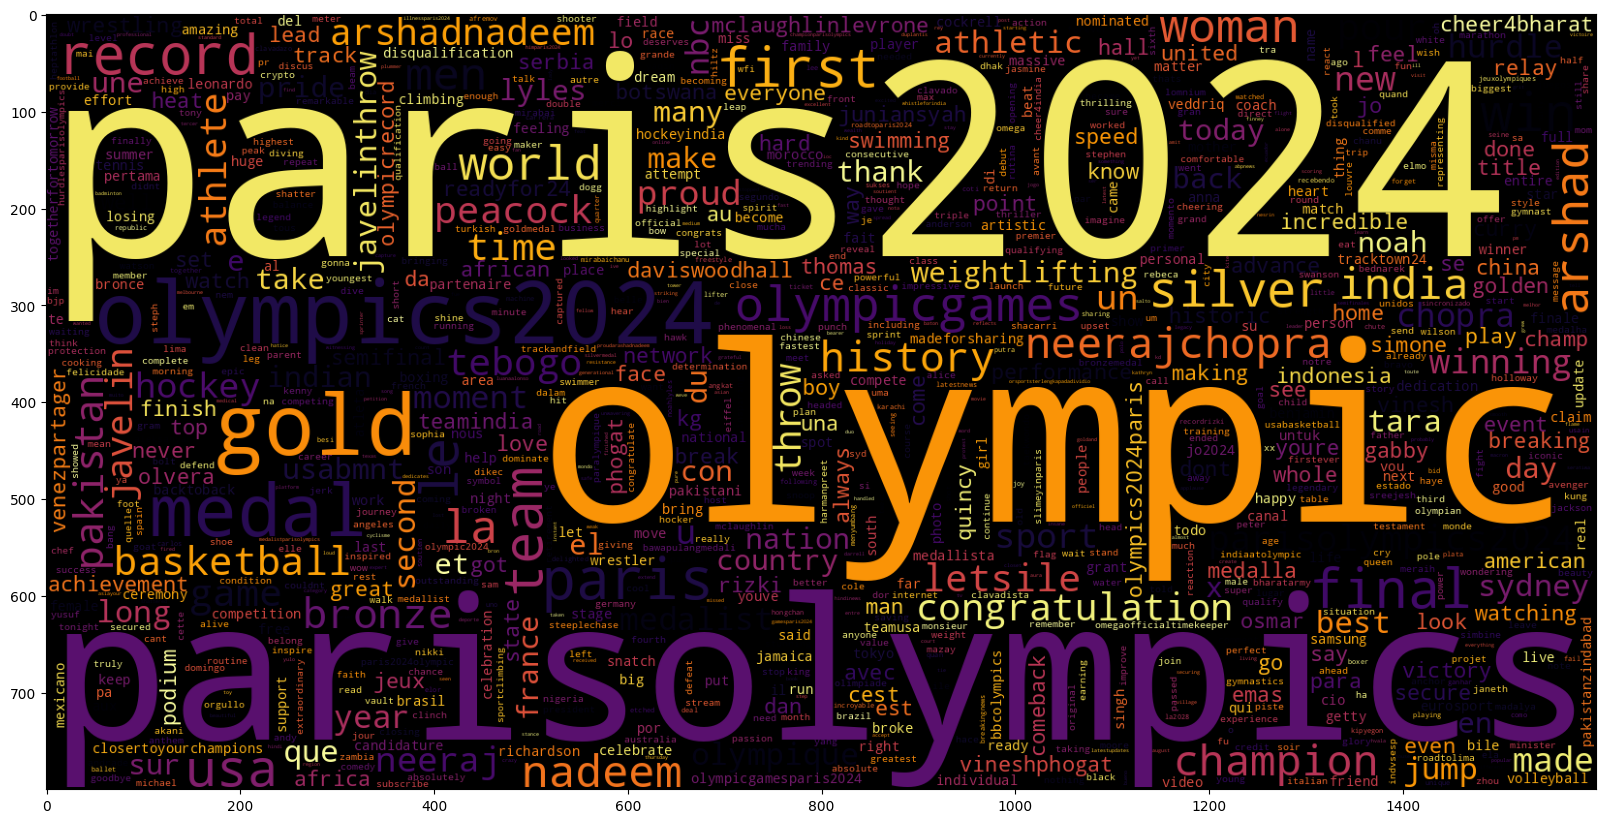

In [183]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Extract processed text from your DataFrame
processedtext = df['clean_tweet'].tolist()

# Use all processed text (up to the length of your dataset)
data_neg = processedtext[:len(processedtext)]

plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False, colormap='inferno').generate(" ".join(data_neg))
plt.imshow(wc)
plt.show()

In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53171 entries, 0 to 53170
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Category                  53171 non-null  object
 1   Keyword                   53171 non-null  object
 2   Web_Page_URL              53171 non-null  object
 3   Tweet_Website             53171 non-null  object
 4   Author_Name               53132 non-null  object
 5   Author_Web_Page_URL       53171 non-null  object
 6   Tweet_Timestamp           49848 non-null  object
 7   Tweet_Content             53153 non-null  object
 8   Tweet_Image_URL           25043 non-null  object
 9   Tweet_Video_URL           53171 non-null  object
 10  Tweet_AD                  53171 non-null  bool  
 11  Tweet_Number_of_Reviews   39908 non-null  object
 12  Tweet_Number_of_Retweets  45432 non-null  object
 13  Tweet_Number_of_Likes     50328 non-null  object
 14  Tweet_Number_of_Looks 

In [185]:
# Save the DataFrame to a new CSV file
df.to_csv('cleaned-sentiments.csv', index=False)


# Exploratory Data Analysis


## Temporal Distribution and Pattern Identification of Tweet Frequency

#### Load the cleaned Dataset

In [186]:
df = pd.read_csv('cleaned-sentiments.csv')

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53171 entries, 0 to 53170
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Category                  53171 non-null  object
 1   Keyword                   53171 non-null  object
 2   Web_Page_URL              53171 non-null  object
 3   Tweet_Website             53171 non-null  object
 4   Author_Name               53132 non-null  object
 5   Author_Web_Page_URL       53171 non-null  object
 6   Tweet_Timestamp           49848 non-null  object
 7   Tweet_Content             53153 non-null  object
 8   Tweet_Image_URL           25043 non-null  object
 9   Tweet_Video_URL           53171 non-null  object
 10  Tweet_AD                  53171 non-null  bool  
 11  Tweet_Number_of_Reviews   39908 non-null  object
 12  Tweet_Number_of_Retweets  45432 non-null  object
 13  Tweet_Number_of_Likes     50328 non-null  object
 14  Tweet_Number_of_Looks 

In [187]:
class OlympicTweetAnalyzer:
    def __init__(self, csv_file):
        self.df = pd.read_csv(csv_file)
        self.df['Tweet_Timestamp'] = pd.to_datetime(self.df['Tweet_Timestamp'])
        self.processedtext = self.df['clean_tweet'].astype(str).tolist()  # Convert to string

    def analyze_distribution(self):
        daily_counts = self.df.groupby(self.df['Tweet_Timestamp'].dt.date).size()
        return daily_counts

    def identify_patterns(self):
        hourly_counts = self.df.groupby([self.df['Tweet_Timestamp'].dt.date,
                                         self.df['Tweet_Timestamp'].dt.hour]).size().unstack(fill_value=0)
        return hourly_counts

    def plot_distribution(self, daily_counts):
        plt.figure(figsize=(16, 8))
        daily_counts.plot(kind='bar')
        plt.title('Distribution of Tweets Over Time', fontsize=16)
        plt.xlabel('Date', fontsize=12)
        plt.ylabel('Number of Tweets', fontsize=12)
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

    def plot_heatmap(self, hourly_counts):
        plt.figure(figsize=(16, 10))
        sns.heatmap(hourly_counts, cmap='YlOrRd')
        plt.title('Heatmap of Tweet Frequency by Date and Hour', fontsize=16)
        plt.xlabel('Hour of Day', fontsize=12)
        plt.ylabel('Date', fontsize=12)
        plt.tight_layout()
        plt.show()

    def identify_spikes(self, daily_counts, threshold=1.5):
        mean_tweets = daily_counts.mean()
        std_tweets = daily_counts.std()
        spikes = daily_counts[daily_counts > (mean_tweets + threshold * std_tweets)]
        return spikes

    def analyze_and_plot(self):
        daily_counts = self.analyze_distribution()
        hourly_counts = self.identify_patterns()
        spikes = self.identify_spikes(daily_counts)

        print("Overall tweet distribution:")
        print(daily_counts)

        print("\nDays with significant spikes in tweet activity:")
        print(spikes)

        return daily_counts, hourly_counts, spikes


In [188]:
 ## Initialize the analyzer and perform the analysis
analyzer = OlympicTweetAnalyzer('cleaned-sentiments.csv')
daily_counts, hourly_counts, spikes = analyzer.analyze_and_plot()


Overall tweet distribution:
Tweet_Timestamp
2009-12-20        2
2010-11-01        2
2011-02-27        2
2011-03-12        2
2012-01-14        2
              ...  
2024-08-05      521
2024-08-06     1476
2024-08-07     5717
2024-08-08    27099
2024-08-09     3589
Length: 668, dtype: int64

Days with significant spikes in tweet activity:
Tweet_Timestamp
2024-08-07     5717
2024-08-08    27099
2024-08-09     3589
dtype: int64


In [189]:
def plot_distribution(self, daily_counts):
    plt.figure(figsize=(16, 8))
    daily_counts.plot(kind='barh')
    plt.title('Distribution of Tweets Over Time', fontsize=16)
    plt.xlabel('Number of Tweets', fontsize=12)
    plt.ylabel('Date', fontsize=12)

    # Rotate labels with increased spacing
    plt.xticks(rotation=90, ha='center')

    plt.tight_layout()
    plt.show()

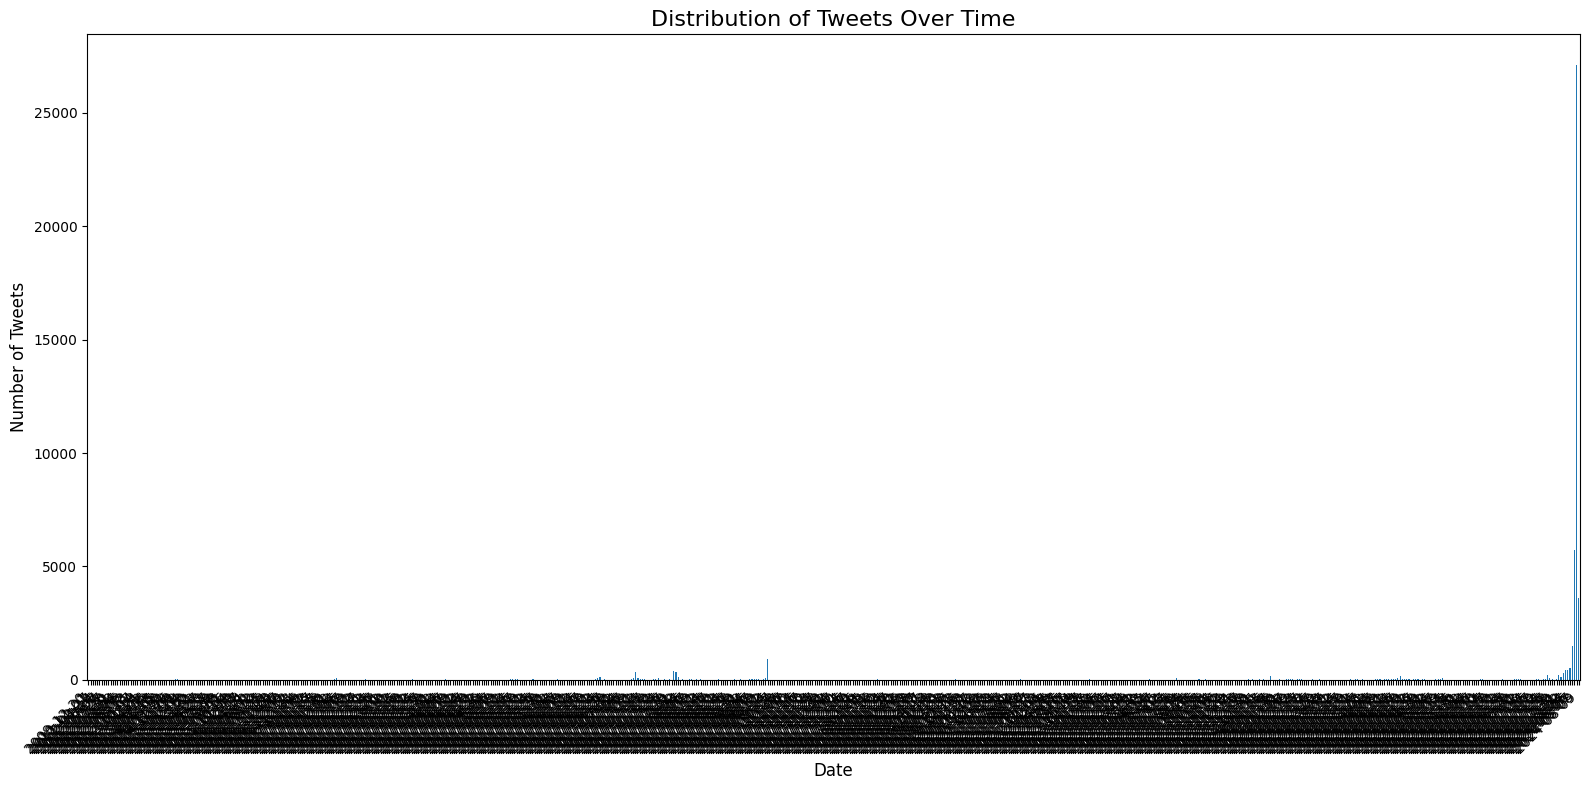

In [190]:
# Plot the distribution of tweets over time
analyzer.plot_distribution(daily_counts)

* The bar chart reveals a significant spike in tweet activity on August 8th, 2024, indicating an intense burst of Twitter activity likely related to the 2024 Olympics. This surge in tweets may coincide with a major event or announcement that took place on that day.

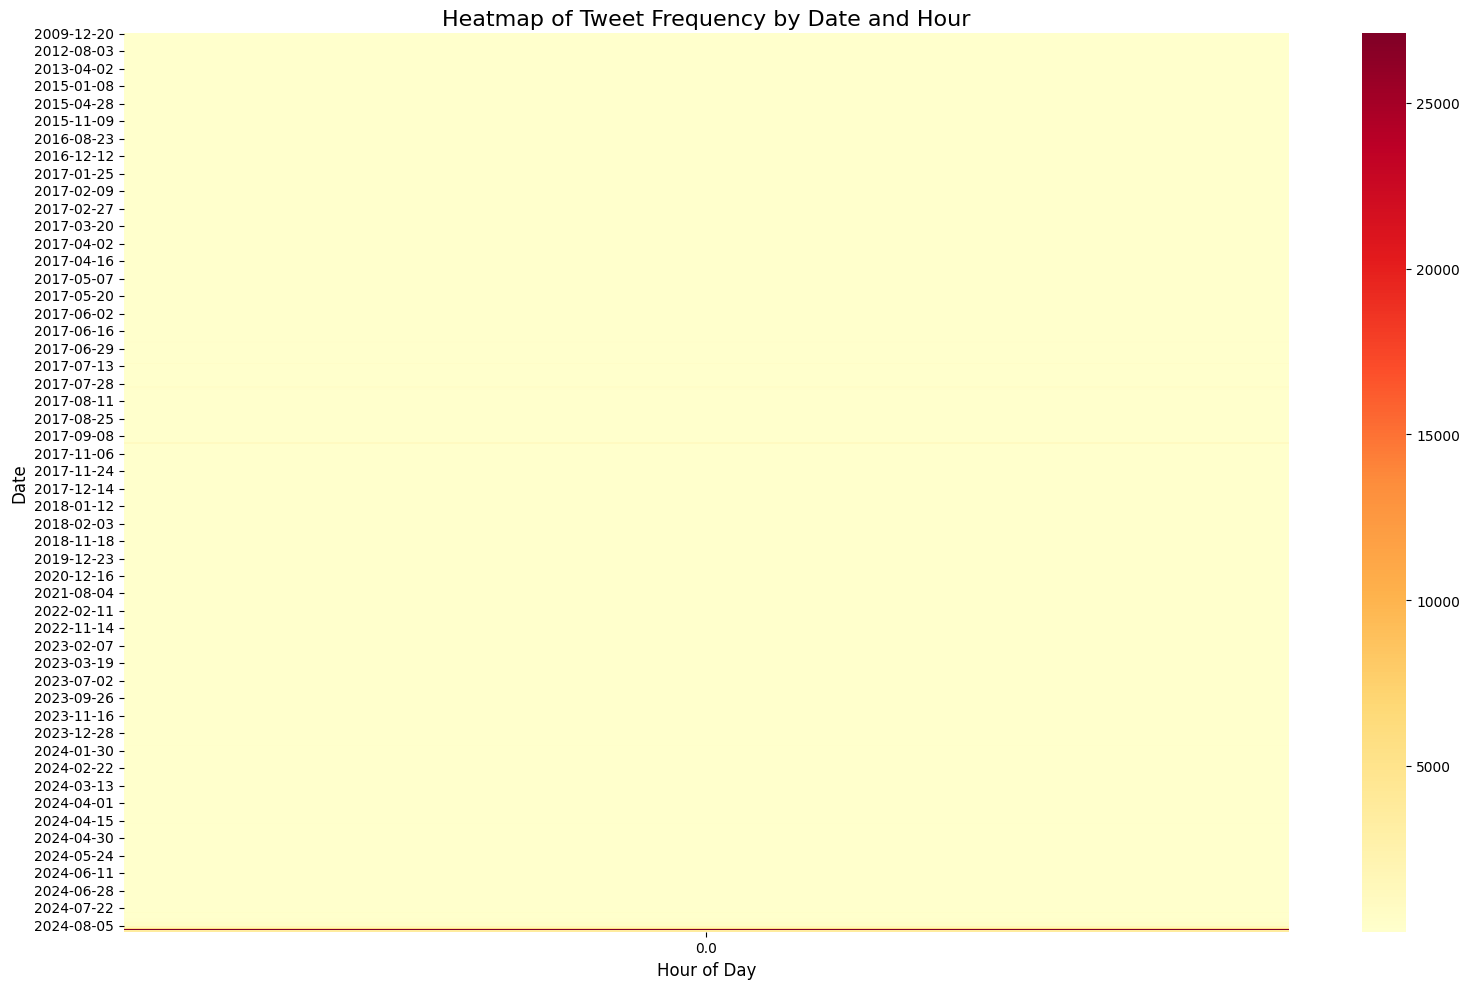

In [191]:
# Plot the heatmap of tweet frequency by date and hour

analyzer.plot_heatmap(hourly_counts)




Analyzing engagement distributions...


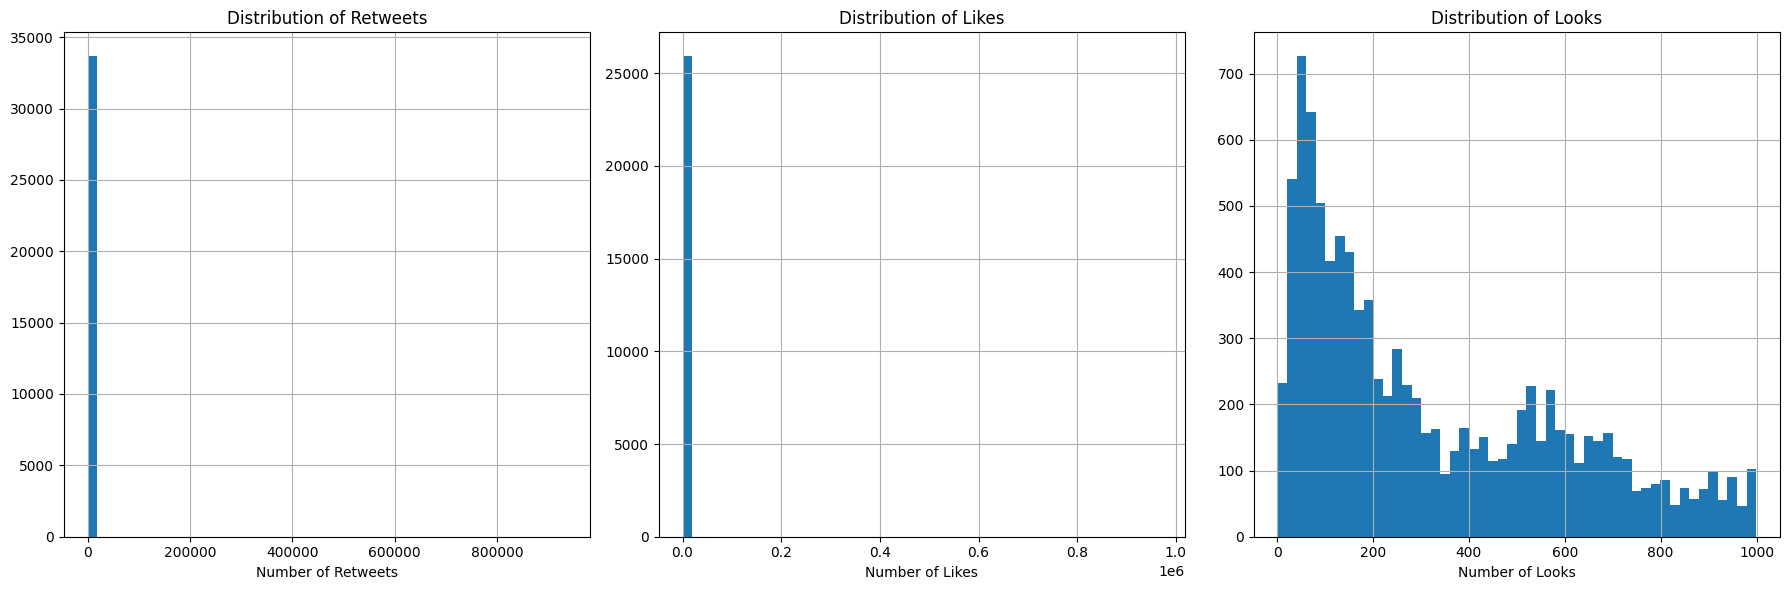


Identifying top tweets...

Top 10 tweets by Tweet_Number_of_Retweets:
                                           Tweet_Content  \
19103  OLYMPIC RECORDIndonesia's Rizki Juniansyah set...   
38658  OLYMPIC RECORDIndonesia's Rizki Juniansyah set...   
2846   KATHRYN PLUMMER WINS IT. The United States is ...   
29718  KATHRYN PLUMMER WINS IT. The United States is ...   
17112  #GOLD AND AN #OLYMPICRECORD! Arshad Nadeem shi...   
36971  #GOLD AND AN #OLYMPICRECORD! Arshad Nadeem shi...   
52757  #GOLD AND AN #OLYMPICRECORD! Arshad Nadeem shi...   
14490  TARA DAVIS-WOODHALL IS AN OLYMPIC CHAMPION! #P...   
15783  TARA DAVIS-WOODHALL IS AN OLYMPIC CHAMPION! #P...   
35642  TARA DAVIS-WOODHALL IS AN OLYMPIC CHAMPION! #P...   

       Tweet_Number_of_Retweets  
19103                  934944.0  
38658                  934944.0  
2846                   916917.0  
29718                  916917.0  
17112                  898904.0  
36971                  898904.0  
52757                  898904.

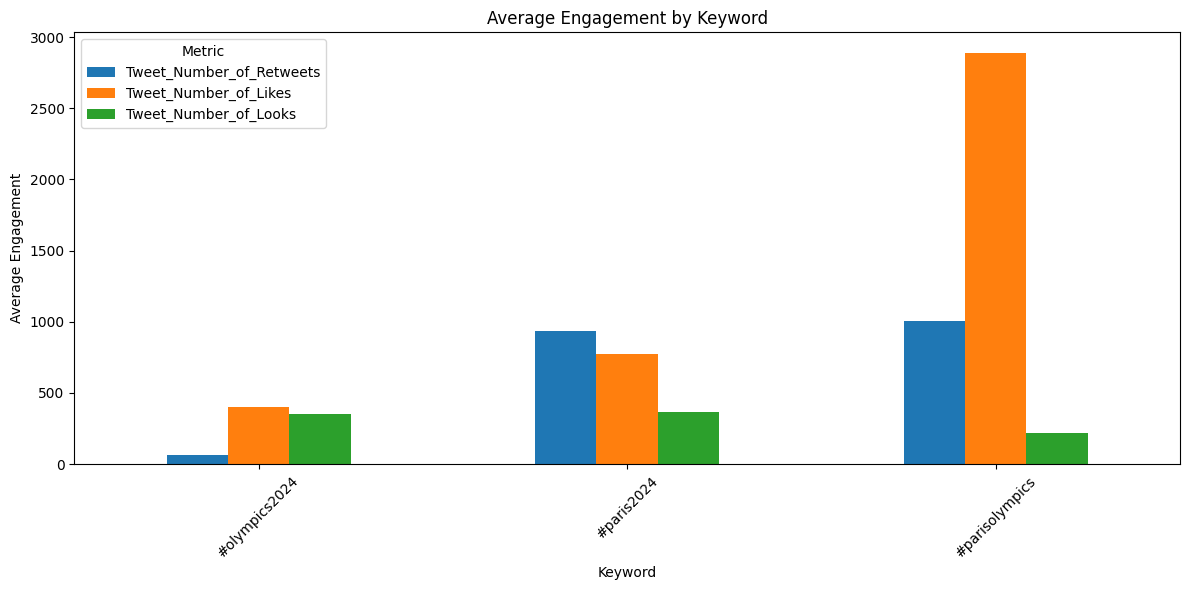

In [192]:
class EngagementAnalyzer:
    def __init__(self, csv_file):
        self.df = pd.read_csv(csv_file)
        self.df['Tweet_Timestamp'] = pd.to_datetime(self.df['Tweet_Timestamp'])

        # Convert engagement metrics to numeric, handling errors
        for col in ['Tweet_Number_of_Retweets', 'Tweet_Number_of_Likes', 'Tweet_Number_of_Looks']:
            self.df[col] = pd.to_numeric(self.df[col], errors='coerce')



    def analyze_engagement_distribution(self):
        fig, axes = plt.subplots(1, 3, figsize=(18, 6))

        self.df['Tweet_Number_of_Retweets'].hist(ax=axes[0], bins=50)
        axes[0].set_title('Distribution of Retweets')
        axes[0].set_xlabel('Number of Retweets')

        self.df['Tweet_Number_of_Likes'].hist(ax=axes[1], bins=50)
        axes[1].set_title('Distribution of Likes')
        axes[1].set_xlabel('Number of Likes')

        self.df['Tweet_Number_of_Looks'].hist(ax=axes[2], bins=50)
        axes[2].set_title('Distribution of Looks')
        axes[2].set_xlabel('Number of Looks')

        plt.tight_layout()
        plt.show()

    def identify_top_tweets(self, n=10):
        metrics = ['Tweet_Number_of_Retweets', 'Tweet_Number_of_Likes', 'Tweet_Number_of_Looks']
        top_tweets = {}

        for metric in metrics:
            top_tweets[metric] = self.df.nlargest(n, metric)[['Tweet_Content', metric]]

        return top_tweets

    def calculate_average_engagement(self):
        return {
            'Avg Retweets': self.df['Tweet_Number_of_Retweets'].mean(),
            'Avg Likes': self.df['Tweet_Number_of_Likes'].mean(),
            'Avg Looks': self.df['Tweet_Number_of_Looks'].mean()
        }

    def compare_engagement_by_keyword(self):
        engagement_by_keyword = self.df.groupby('Keyword').agg({
            'Tweet_Number_of_Retweets': 'mean',
            'Tweet_Number_of_Likes': 'mean',
            'Tweet_Number_of_Looks': 'mean'
        })

        engagement_by_keyword.plot(kind='bar', figsize=(12, 6))
        plt.title('Average Engagement by Keyword')
        plt.xlabel('Keyword')
        plt.ylabel('Average Engagement')
        plt.legend(title='Metric')
        plt.xticks(rotation=45)
        plt.tight_layout()

        plt.show()

    def run_analysis(self):
        print("Analyzing engagement distributions...")
        self.analyze_engagement_distribution()

        print("\nIdentifying top tweets...")
        top_tweets = self.identify_top_tweets()
        for metric, tweets in top_tweets.items():
            print(f"\nTop 10 tweets by {metric}:")
            print(tweets)

        print("\nCalculating average engagement rates...")
        avg_engagement = self.calculate_average_engagement()
        for metric, value in avg_engagement.items():
            print(f"{metric}: {value:.2f}")

        print("\nComparing engagement across keywords...")
        self.compare_engagement_by_keyword()

# Initialize
analyzer = EngagementAnalyzer('cleaned-sentiments.csv')
analyzer.run_analysis()

## Observations

### Distribution of Retweets:

* There's a sharp decline in frequency as the number of retweets increases.

### Distribution of Likes:

* The distribution is heavily skewed towards lower numbers of likes

### Distribution of Looks

* The distribution of looks is more spread out compared to retweets and likes

### Average Engagement by Keyword

* Three keywords are compared: #olympics2024, #paris2024, and #parisolympics.
* Across all keywords, the number of looks (views) far exceeds likes and retweets.
* #olympics2024 seems to have the highest average engagement across all metrics.
* Retweets are consistently the lowest form of engagement for all keywords.
* The differences in engagement between keywords are relatively small, suggesting similar levels of interest.





## Frequently mentioned athletes, events, or Olympic-specific terms

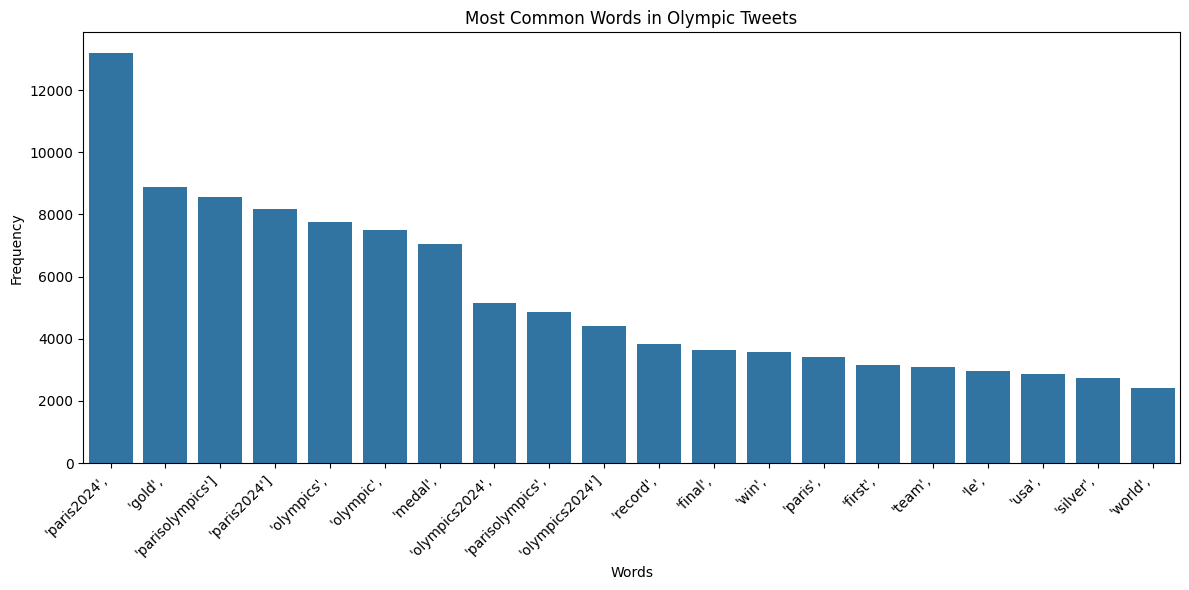

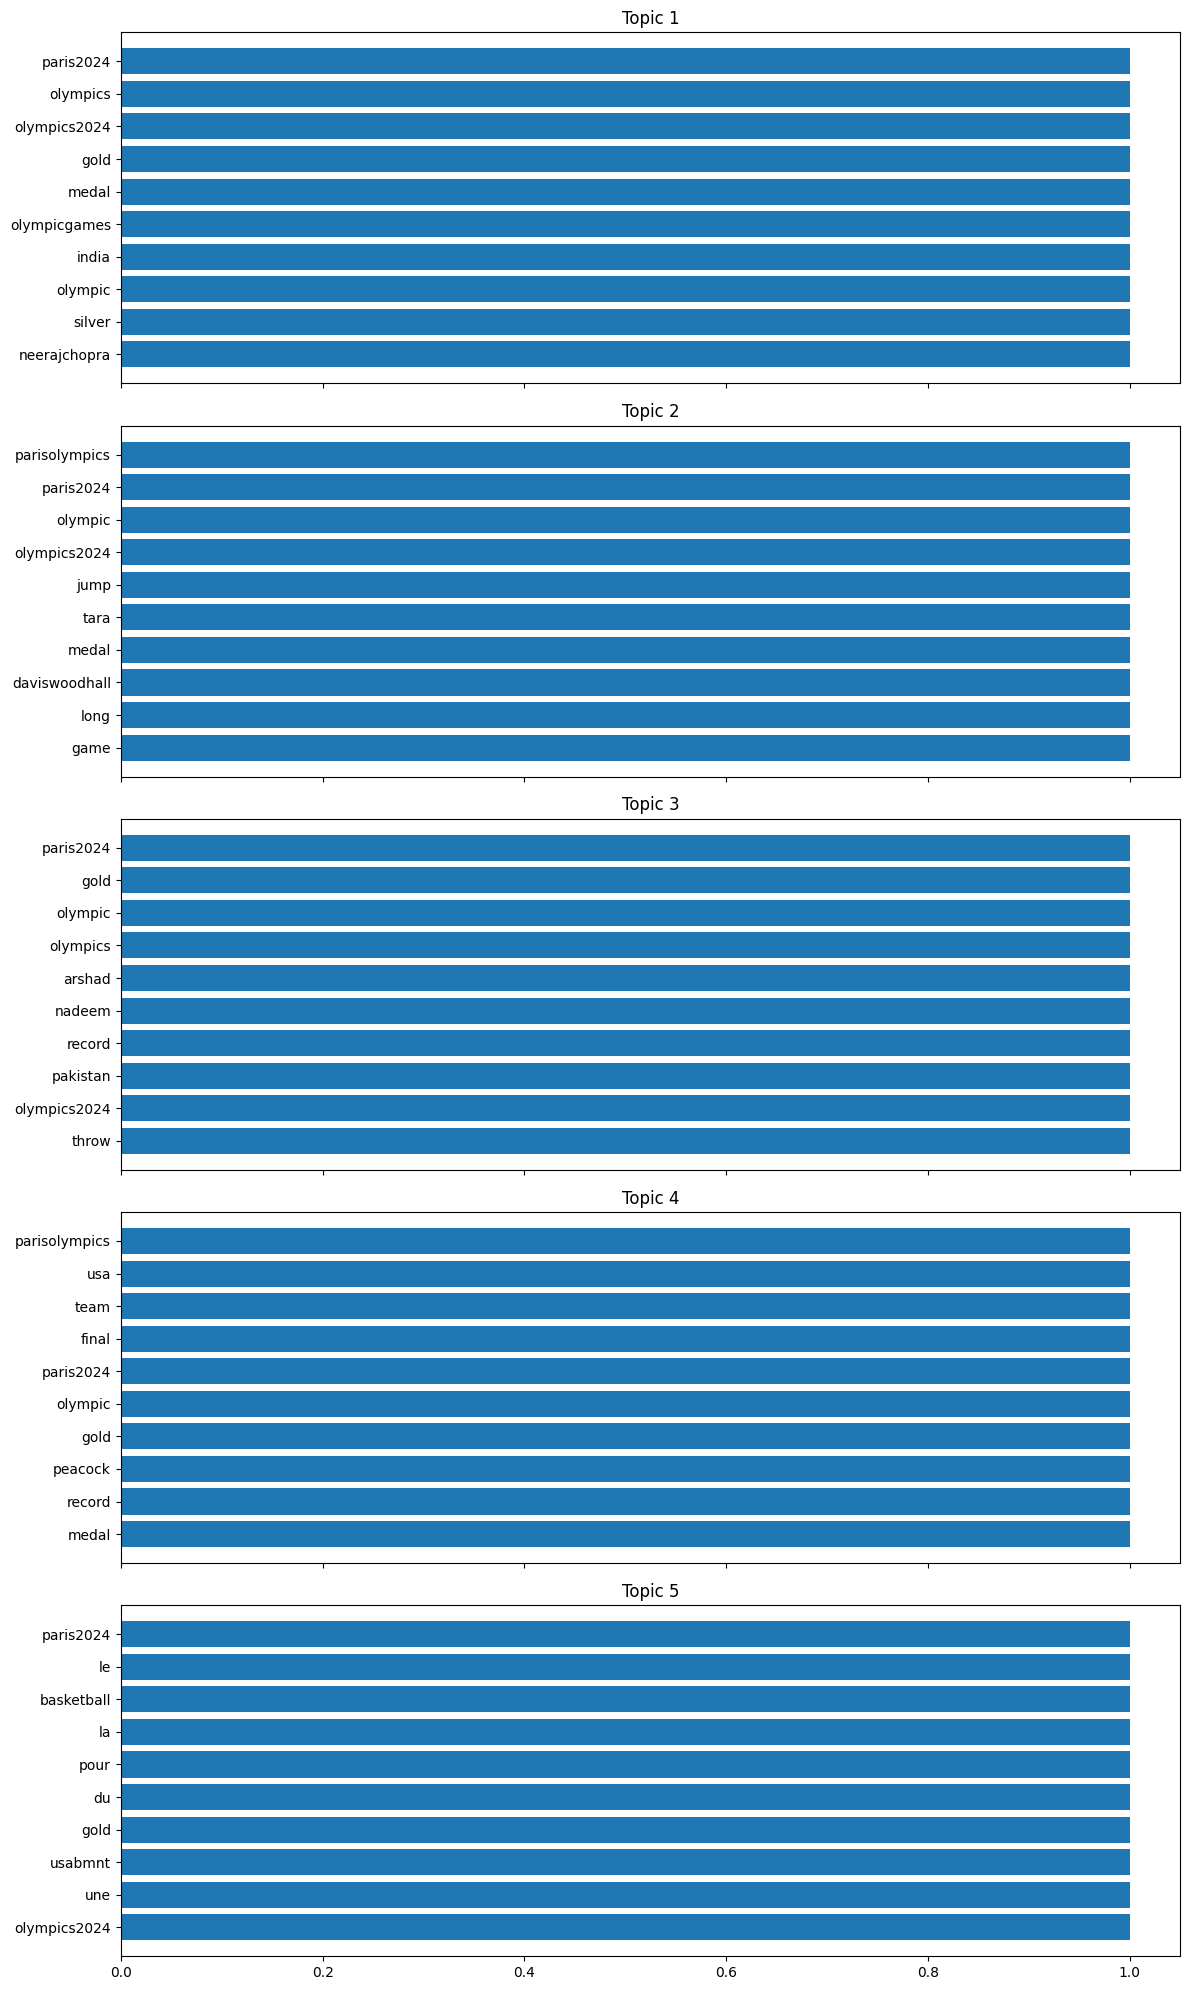

No named entities found to plot.


In [193]:

from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
class OlympicsTweetAnalyzer:
    def __init__(self, df):
        self.df = df
        self.common_words = None
        self.topics = None
        self.named_entities = None

    def join_text(self, text_list):
        # Check if the input is already a string (for cases where lemmatization wasn't applied)
        if isinstance(text_list, str):
            return text_list
        return ' '.join(text_list)

    def preprocess(self):
        self.df['clean_tweet'] = self.df['lemmatized_tweet'].apply(self.join_text)
        self.processedtext = self.df['clean_tweet'].tolist()

    def analyze_common_words(self, n=20):
        all_words = ' '.join(self.processedtext)
        word_freq = Counter(all_words.split())
        self.common_words = dict(word_freq.most_common(n))

    def identify_topics(self, n_topics=5, n_top_words=10):
        vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
        doc_term_matrix = vectorizer.fit_transform(self.processedtext)

        lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
        lda.fit(doc_term_matrix)

        feature_names = vectorizer.get_feature_names_out()
        self.topics = []
        for topic_idx, topic in enumerate(lda.components_):
            top_words = [feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
            self.topics.append(top_words)

    def extract_named_entities(self, n=20):
        all_words = ' '.join(self.processedtext).split()
        capitalized_words = [word for word in all_words if word[0].isupper()]
        self.named_entities = dict(Counter(capitalized_words).most_common(n))

    def plot_common_words(self):
        if not self.common_words:
            print("No common words to plot.")
            return

        plt.figure(figsize=(12, 6))
        sns.barplot(x=list(self.common_words.keys()), y=list(self.common_words.values()))
        plt.title('Most Common Words in Olympic Tweets')
        plt.xlabel('Words')
        plt.ylabel('Frequency')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

    def plot_topics(self):
        if not self.topics:
            print("No topics to plot.")
            return

        fig, axes = plt.subplots(len(self.topics), 1, figsize=(12, 4*len(self.topics)), sharex=True)
        for i, topic in enumerate(self.topics):
            axes[i].barh(range(len(topic)), [1]*len(topic), align='center')
            axes[i].set_yticks(range(len(topic)))
            axes[i].set_yticklabels(topic)
            axes[i].invert_yaxis()
            axes[i].set_title(f'Topic {i+1}')
        plt.tight_layout()
        plt.show()

    def plot_named_entities(self):
        if not self.named_entities:
            print("No named entities found to plot.")
            return

        plt.figure(figsize=(12, 6))
        sns.barplot(x=list(self.named_entities.keys()), y=list(self.named_entities.values()))
        plt.title('Most Frequently Mentioned Named Entities')
        plt.xlabel('Entities')
        plt.ylabel('Frequency')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()


analyzer = OlympicsTweetAnalyzer(df)
analyzer.preprocess()
analyzer.analyze_common_words()
analyzer.identify_topics()
analyzer.extract_named_entities()

analyzer.plot_common_words()
analyzer.plot_topics()
analyzer.plot_named_entities()

##  frequency and impact of Olympic-specific keywords

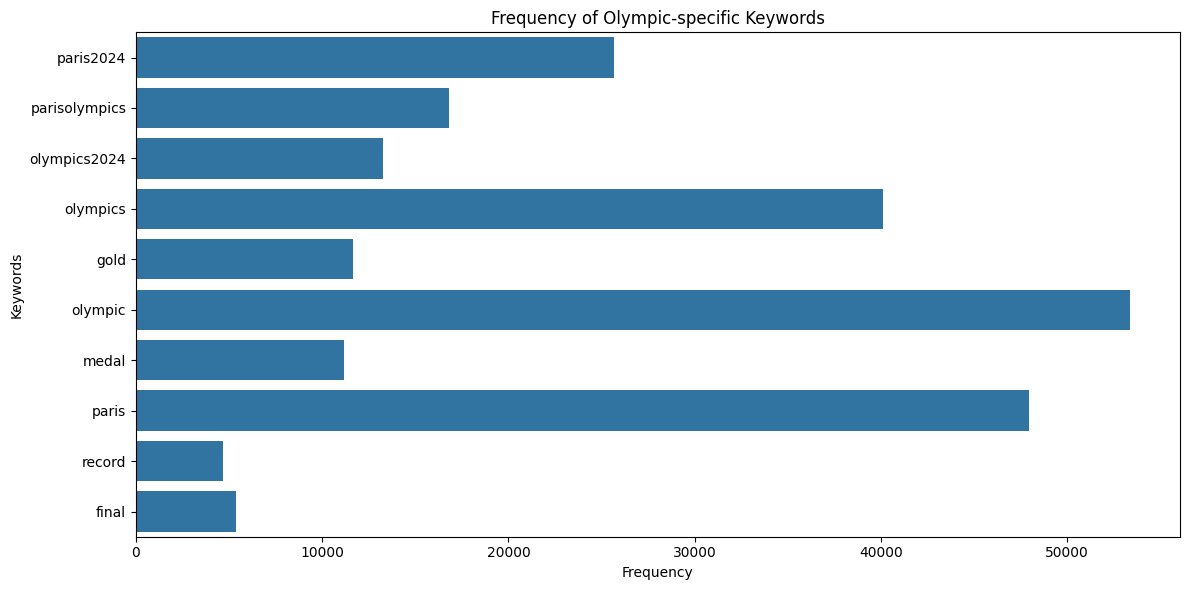

<ipython-input-198-425e26393d30>:93: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(ax1.get_yticklabels(), rotation=0, ha='right')
<ipython-input-198-425e26393d30>:97: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(ax2.get_yticklabels(), rotation=0, ha='right')
<ipython-input-198-425e26393d30>:101: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_yticklabels(ax3.get_yticklabels(), rotation=0, ha='right')


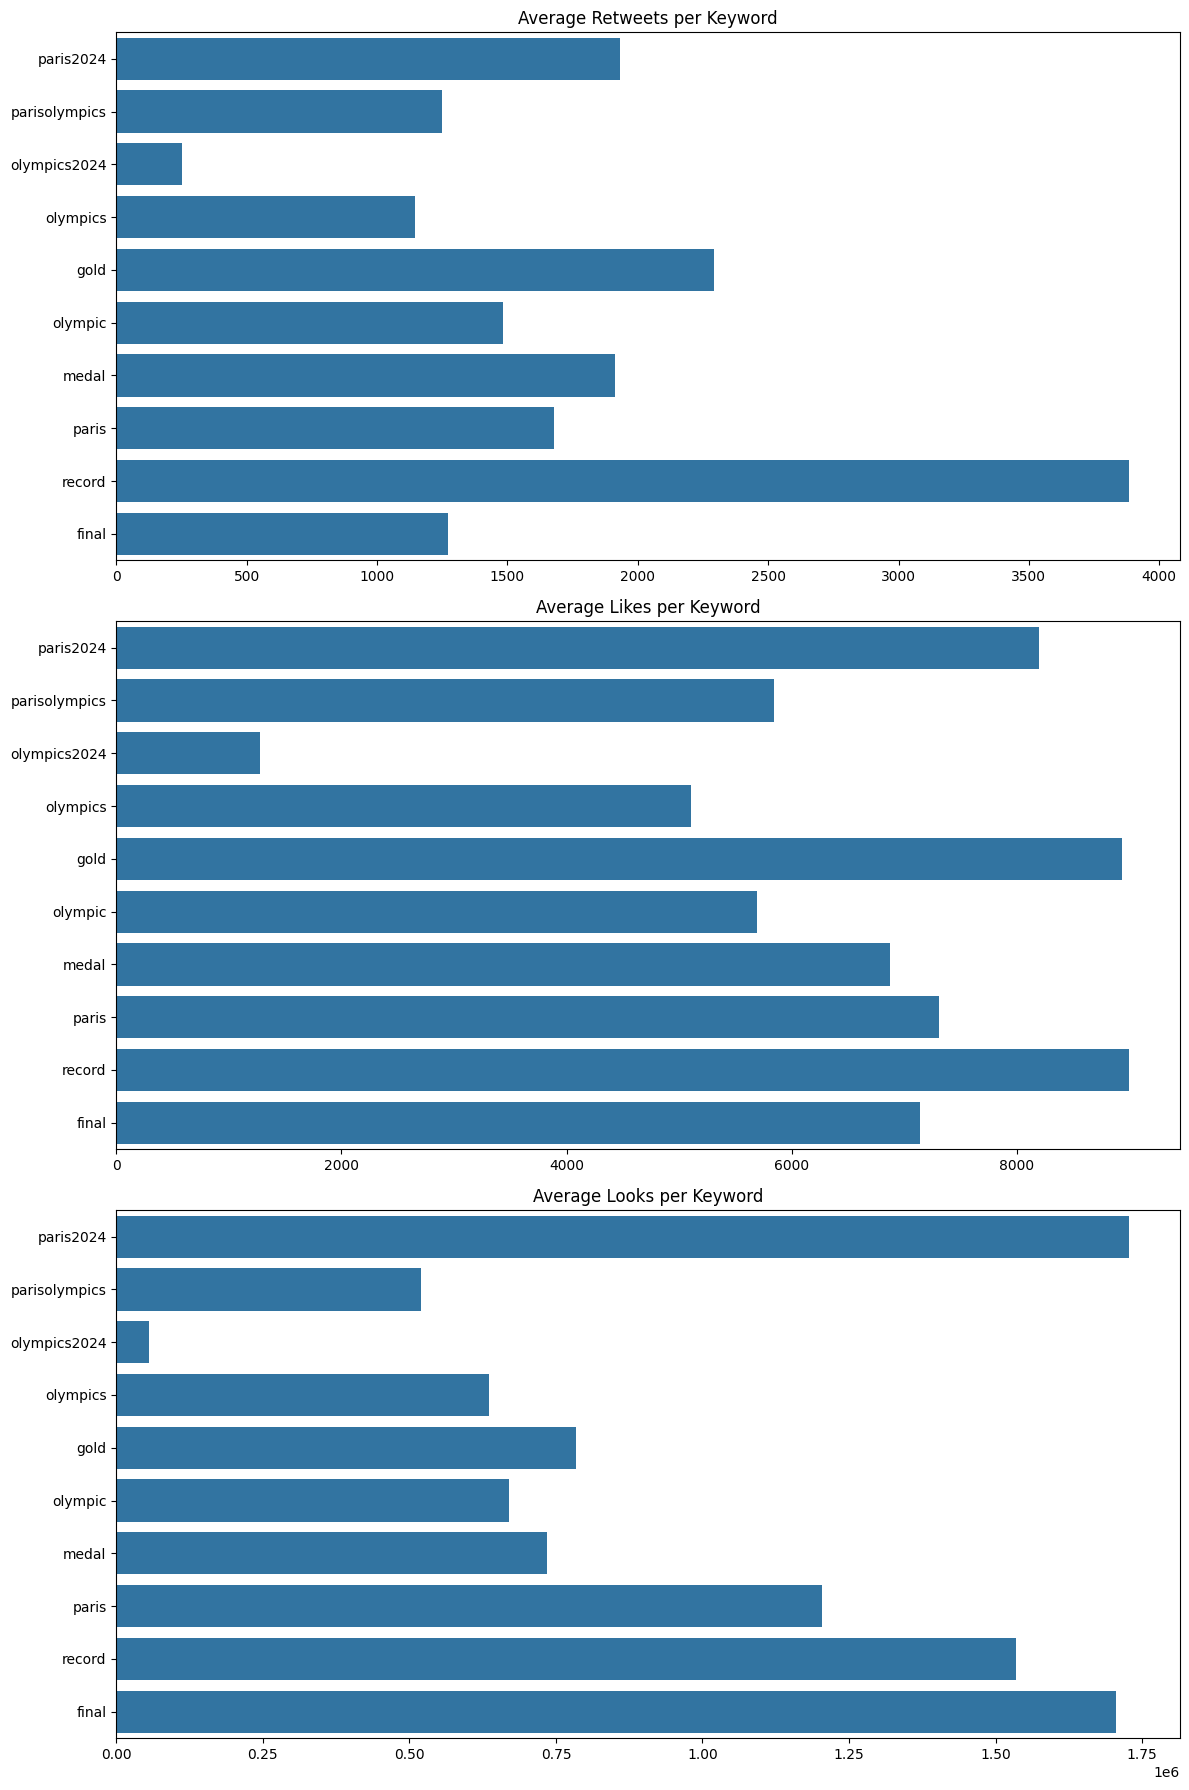

<ipython-input-198-425e26393d30>:120: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(ax1.get_yticklabels(), rotation=0, ha='right')
<ipython-input-198-425e26393d30>:124: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(ax2.get_yticklabels(), rotation=0, ha='right')
<ipython-input-198-425e26393d30>:128: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_yticklabels(ax3.get_yticklabels(), rotation=0, ha='right')


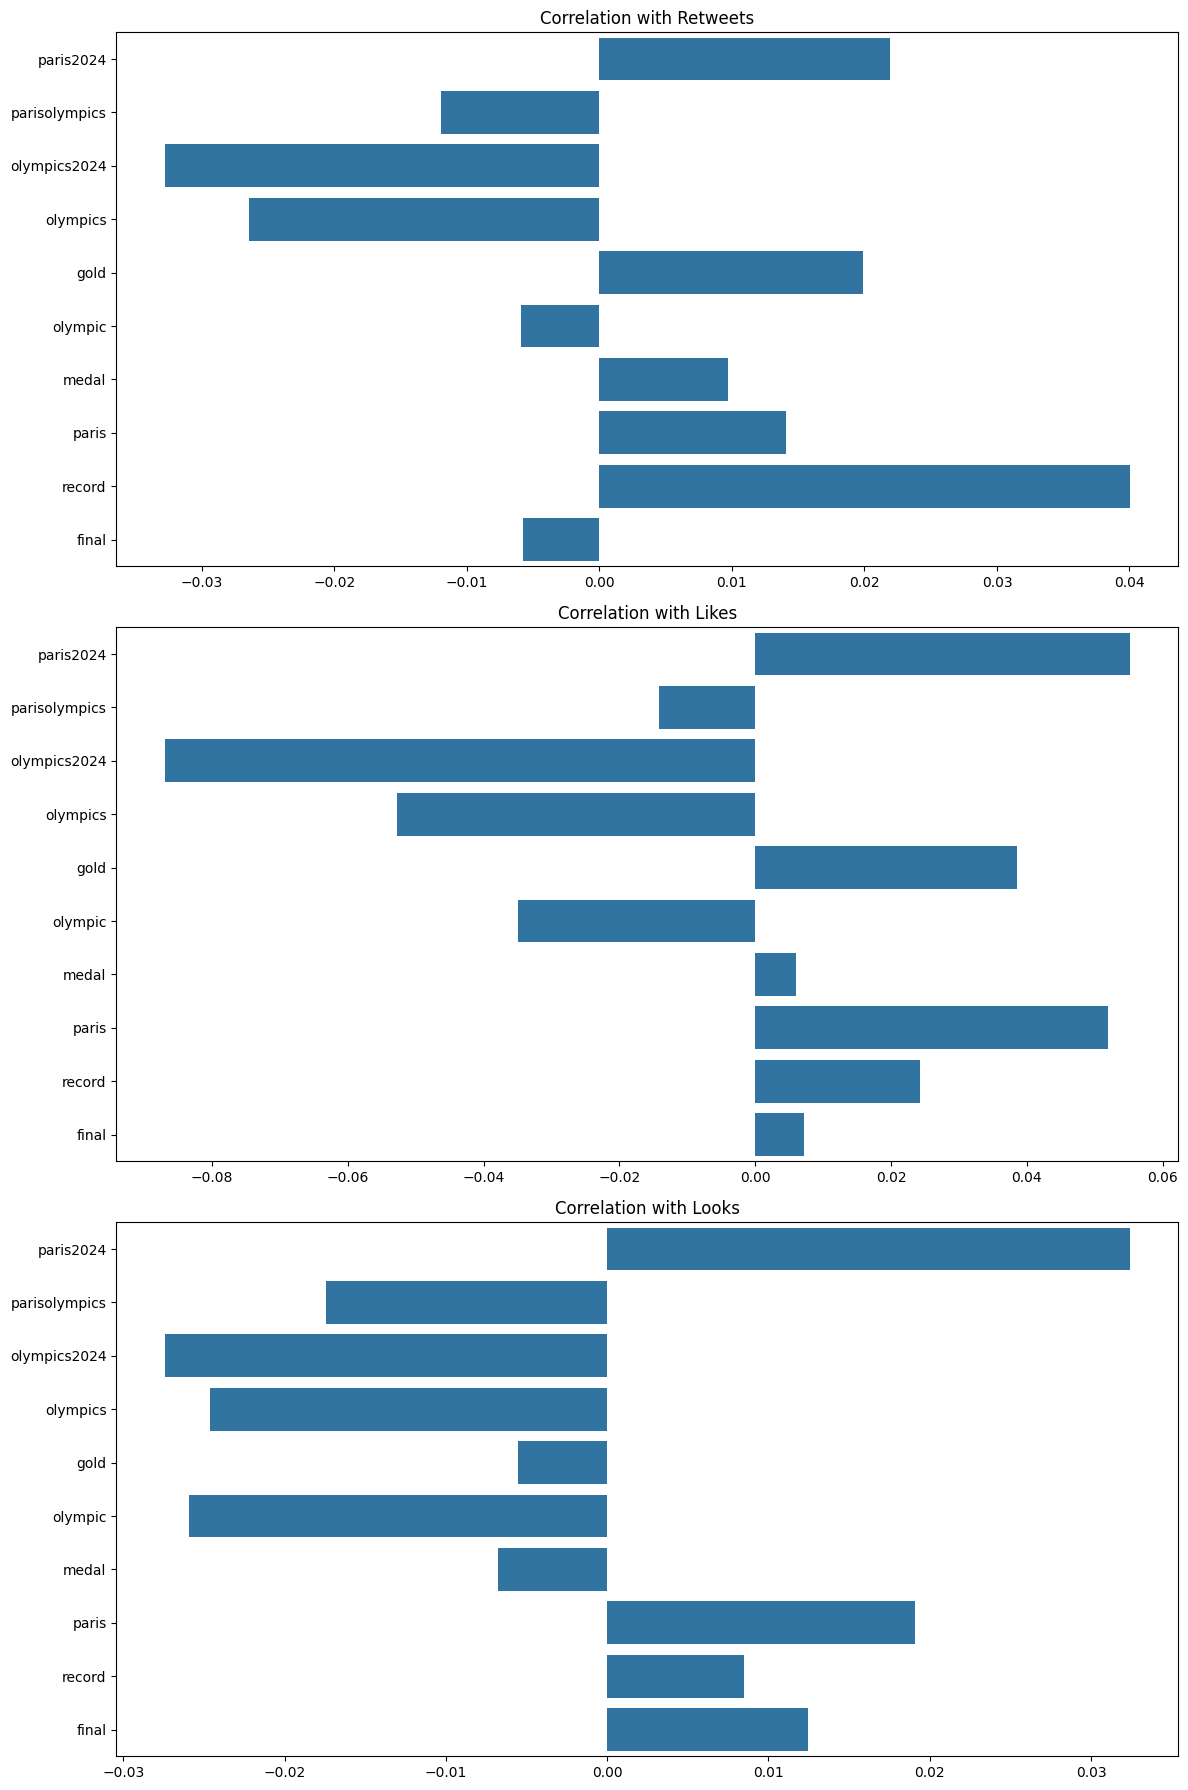

In [198]:
class OlympicKeywordAnalyzer:
    def __init__(self, df, n_keywords=10):
        self.df = df
        self.keyword_freq = None
        self.keyword_impact = None
        self.keyword_engagement = None
        self.n_keywords = n_keywords
        self.keywords = []

    def preprocess(self):
        # Ensure the 'lemmatized_tweet' column is properly processed
        self.df['clean_tweet'] = self.df['lemmatized_tweet'].apply(lambda x: ' '.join(eval(x)))

    def convert_to_numeric(self):
        def convert_value(value):
            try:
                if isinstance(value, str):
                    if 'K' in value:
                        value = float(value.replace('K', '')) * 1e3
                    elif 'M' in value:
                        value = float(value.replace('M', '')) * 1e6
                return float(value)
            except ValueError:
                return None

        for column in ['Tweet_Number_of_Retweets', 'Tweet_Number_of_Likes', 'Tweet_Number_of_Looks']:
            self.df[column] = self.df[column].apply(convert_value)

    def extract_keywords(self):
        all_words = ' '.join(self.df['clean_tweet'].tolist()).split()
        common_words = Counter(all_words).most_common(self.n_keywords)
        self.keywords = [word for word, _ in common_words]

    def analyze_keyword_frequency(self):
      self.keyword_freq = {}
      for keyword in self.keywords:
        self.keyword_freq[keyword] = self.df['clean_tweet'].str.count(keyword).sum()

    def analyze_keyword_impact(self):
        self.keyword_impact = {}
        for keyword in self.keywords:
            tweets_with_keyword = self.df[self.df['clean_tweet'].str.contains(keyword)]
            avg_retweets = tweets_with_keyword['Tweet_Number_of_Retweets'].mean()
            avg_likes = tweets_with_keyword['Tweet_Number_of_Likes'].mean()
            avg_looks = tweets_with_keyword['Tweet_Number_of_Looks'].mean()
            self.keyword_impact[keyword] = {
                'avg_retweets': avg_retweets,
                'avg_likes': avg_likes,
                'avg_looks': avg_looks
            }

    def analyze_keyword_engagement_correlation(self):
        self.keyword_engagement = {}
        for keyword in self.keywords:
            self.df[f'contains_{keyword}'] = self.df['clean_tweet'].str.contains(keyword).astype(int)
            corr_retweets = self.df[f'contains_{keyword}'].corr(self.df['Tweet_Number_of_Retweets'])
            corr_likes = self.df[f'contains_{keyword}'].corr(self.df['Tweet_Number_of_Likes'])
            corr_looks = self.df[f'contains_{keyword}'].corr(self.df['Tweet_Number_of_Looks'])
            self.keyword_engagement[keyword] = {
                'corr_retweets': corr_retweets,
                'corr_likes': corr_likes,
                'corr_looks': corr_looks
            }
            self.df.drop(f'contains_{keyword}', axis=1, inplace=True)

    def plot_keyword_frequency(self):
        if not self.keyword_freq:
            print("No keyword frequency data to plot.")
            return

        plt.figure(figsize=(12, 6))
        sns.barplot(y=list(self.keyword_freq.keys()), x=list(self.keyword_freq.values()))
        plt.title('Frequency of Olympic-specific Keywords')
        plt.xlabel('Frequency')
        plt.ylabel('Keywords')
        plt.tight_layout()
        plt.show()

    def plot_keyword_impact(self):
        if not self.keyword_impact:
            print("No keyword impact data to plot.")
            return

        fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 18))

        keywords = list(self.keyword_impact.keys())
        avg_retweets = [self.keyword_impact[k]['avg_retweets'] for k in keywords]
        avg_likes = [self.keyword_impact[k]['avg_likes'] for k in keywords]
        avg_looks = [self.keyword_impact[k]['avg_looks'] for k in keywords]

        sns.barplot(y=keywords, x=avg_retweets, ax=ax1)
        ax1.set_title('Average Retweets per Keyword')
        ax1.set_yticklabels(ax1.get_yticklabels(), rotation=0, ha='right')

        sns.barplot(y=keywords, x=avg_likes, ax=ax2)
        ax2.set_title('Average Likes per Keyword')
        ax2.set_yticklabels(ax2.get_yticklabels(), rotation=0, ha='right')

        sns.barplot(y=keywords, x=avg_looks, ax=ax3)
        ax3.set_title('Average Looks per Keyword')
        ax3.set_yticklabels(ax3.get_yticklabels(), rotation=0, ha='right')

        plt.tight_layout()
        plt.show()

    def plot_keyword_engagement_correlation(self):
        if not self.keyword_engagement:
            print("No keyword engagement correlation data to plot.")
            return

        fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 18))

        keywords = list(self.keyword_engagement.keys())
        corr_retweets = [self.keyword_engagement[k]['corr_retweets'] for k in keywords]
        corr_likes = [self.keyword_engagement[k]['corr_likes'] for k in keywords]
        corr_looks = [self.keyword_engagement[k]['corr_looks'] for k in keywords]

        sns.barplot(y=keywords, x=corr_retweets, ax=ax1)
        ax1.set_title('Correlation with Retweets')
        ax1.set_yticklabels(ax1.get_yticklabels(), rotation=0, ha='right')

        sns.barplot(y=keywords, x=corr_likes, ax=ax2)
        ax2.set_title('Correlation with Likes')
        ax2.set_yticklabels(ax2.get_yticklabels(), rotation=0, ha='right')

        sns.barplot(y=keywords, x=corr_looks, ax=ax3)
        ax3.set_title('Correlation with Looks')
        ax3.set_yticklabels(ax3.get_yticklabels(), rotation=0, ha='right')

        plt.tight_layout()
        plt.show()

# Initialize key word analyzer
df = pd.read_csv('cleaned-sentiments.csv')

analyzer = OlympicKeywordAnalyzer(df)
analyzer.preprocess()
analyzer.convert_to_numeric()  # Convert engagement columns to numeric values
analyzer.extract_keywords()  # Automatically determine the top n keywords
analyzer.analyze_keyword_frequency()
analyzer.analyze_keyword_impact()
analyzer.analyze_keyword_engagement_correlation()

analyzer.plot_keyword_frequency()
analyzer.plot_keyword_impact()
analyzer.plot_keyword_engagement_correlation()

In [199]:
!pip install textblob

## Analysing Positive and Negative Sentiments

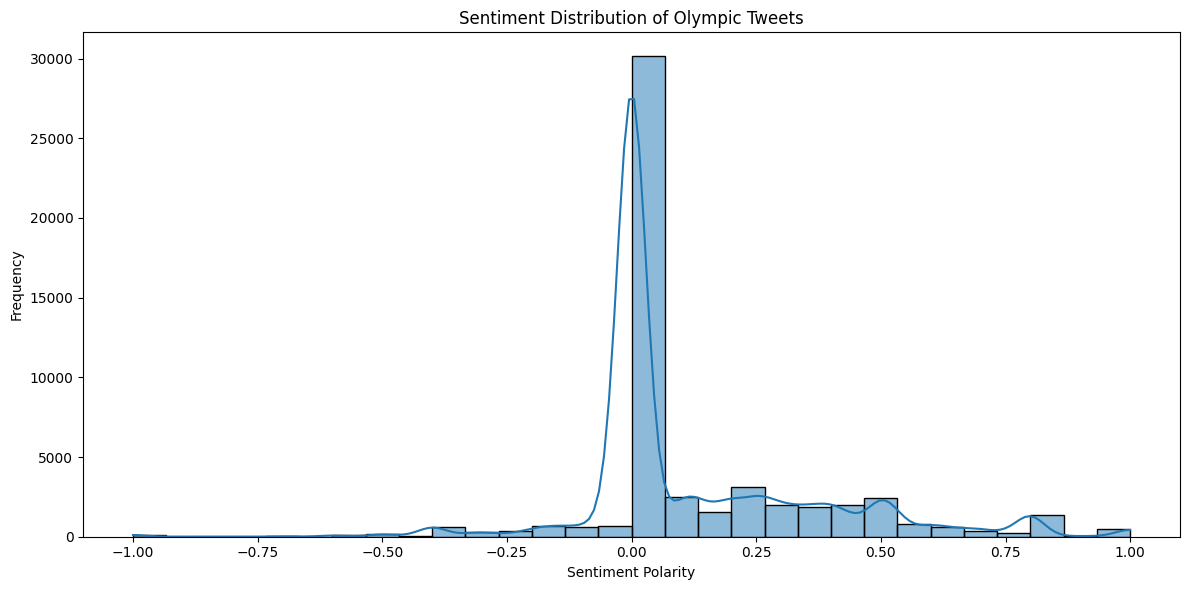

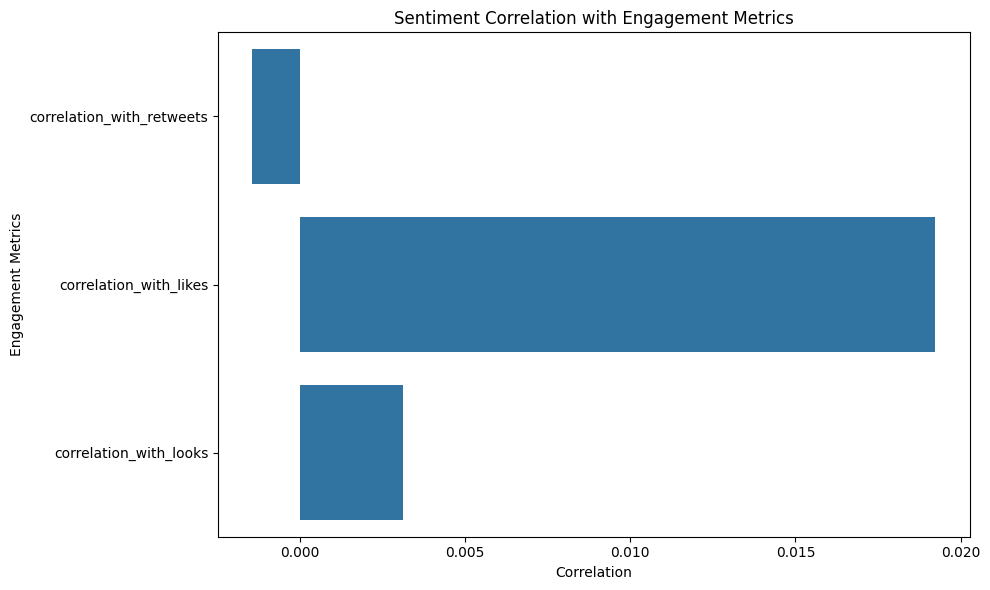

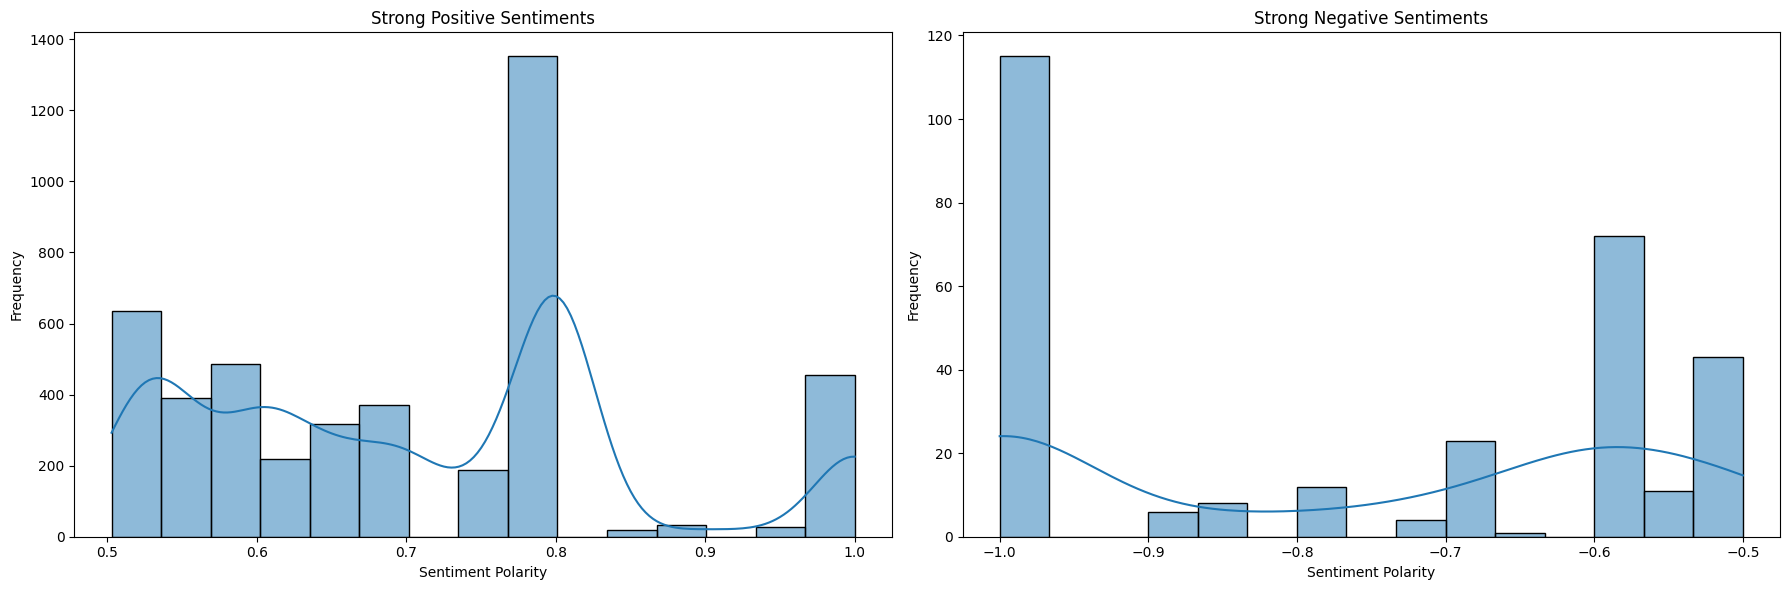

Positive Sentiment Tweets:

Negative Sentiment Tweets:


Category         Keyword  \
92   TopPost   #olympics2024   
208  TopPost   #olympics2024   
361  TopPost   #olympics2024   
437  TopPost  #parisolympics   
697  TopPost      #paris2024   

                                          Web_Page_URL  \
92   https://twitter.com/search?q=#olympics2024&src...   
208  https://twitter.com/search?q=#olympics2024&src...   
361  https://twitter.com/search?q=#olympics2024&src...   
437  https://twitter.com/search?q=#parisolympics&sr...   
697  https://twitter.com/search?q=#paris2024&src=ty...   

                                         Tweet_Website  \
92   https://twitter.com/ChrisChavez/status/1821274...   
208  https://twitter.com/magsp00/status/18213716667...   
361  https://twitter.com/Kumar360Ajeet/status/18212...   
437  https://twitter.com/NBCOlympics/status/1821530...   
697  https://twitter.com/_M_E_H_R_D_A_D_/status/182...   

                                      Author_Name  \
92   Chris ChavezReloadNBC Olympics & Paralympics   
208                 Maggie PetersonTeam USAReload   
361                                   Kumar Ajeet   
437              NBC Olympics & ParalympicsReload   
697                                    Mehrdad Ei   

                     Author_Web_Page_URL Tweet_Timestamp  \
92       https://twitter.com/ChrisChavez      2024-08-07   
208          https://twitter.com/magsp00      2024-08-08   
361    https://twitter.com/Kumar360Ajeet      2024-08-07   
437      https://twitter.com/NBCOlympics      2024-08-08   
697  https://twitter.com/_M_E_H_R_D_A_D_      2024-08-09   

                                         Tweet_Content  \
92   MUST WATCH: KENNETH ROOKS IS CRAZY FOR THIS ON...   
208                    This was insane!! #Olympics2024   
361  The worst Olympic ever!Men are allowed to figh...   
437  Frederick Richard (@FrederickFlips) casually h...   
697  Why is India's performance in the Olympics so ...   

                                       Tweet_Image_URL  \
92                                                 NaN   
208                                                NaN   
361  https://pbs.twimg.com/media/GUZO0xQWIAAVyq6?fo...   
437                                                NaN   
697                                                NaN   

                                       Tweet_Video_URL  Tweet_AD  \
92   https://twitter.com/ChrisChavez/status/1821274...     False   
208  https://twitter.com/magsp00/status/18213716667...     False   
361  https://twitter.com/Kumar360Ajeet/status/18212...     False   
437  https://twitter.com/NBCOlympics/status/1821530...     False   
697  https://twitter.com/_M_E_H_R_D_A_D_/status/182...     False   

    Tweet_Number_of_Reviews  Tweet_Number_of_Retweets  Tweet_Number_of_Likes  \
92                       83                     572.0                 7900.0   
208                     NaN                       NaN                    1.0   
361                     NaN                       NaN                    3.0   
437                      29                     156.0                 1700.0   
697                     NaN                       1.0                    NaN   

     Tweet_Number_of_Looks                                   lemmatized_tweet  \
92               1000000.0  ['watch', 'kenneth', 'rook', 'crazy', 'oneabso...   
208                  137.0                         ['insane', 'olympics2024']   
361                  267.0  ['worst', 'olympic', 'evermen', 'allowed', 'fi...   
437                78000.0  ['frederick', 'richard', 'casually', 'handstan...   
697                  125.0  ['india', 'performance', 'olympics', 'bad', 'o...   

                                           clean_tweet  sentiment  
92   watch kenneth rook crazy oneabsolutely sent si...       -0.6  
208                                insane olympics2024       -1.0  
361  worst olympic evermen allowed fight boxing tod...       -1.0  
437  frederick richard casually handstanding way pa...       -0.5  
697        india p

In [201]:
class OlympicSentimentAnalyzer:
    def __init__(self, df, n_keywords=10):
        self.df = df
        self.n_keywords = n_keywords
        self.keywords = []
        self.sentiment_summary = None
        self.sentiment_correlation = None
        self.strong_sentiments = None

    def preprocess(self):
        # Ensure the 'lemmatized_tweet' column is properly processed
        self.df['clean_tweet'] = self.df['lemmatized_tweet'].apply(lambda x: ' '.join(eval(x)))

    def convert_to_numeric(self):
        def convert_value(value):
            try:
                if isinstance(value, str):
                    if 'K' in value:
                        value = float(value.replace('K', '')) * 1e3
                    elif 'M' in value:
                        value = float(value.replace('M', '')) * 1e6
                return float(value)
            except ValueError:
                return None

        for column in ['Tweet_Number_of_Retweets', 'Tweet_Number_of_Likes', 'Tweet_Number_of_Looks']:
            self.df[column] = self.df[column].apply(convert_value)
            # Further ensure that any remaining non-numeric values are converted to NaN
            self.df[column] = pd.to_numeric(self.df[column], errors='coerce')

    def perform_sentiment_analysis(self):
        # Perform sentiment analysis using TextBlob
        self.df['sentiment'] = self.df['clean_tweet'].apply(lambda text: TextBlob(text).sentiment.polarity)

    def extract_keywords(self):
        # Extract most common keywords from the cleaned tweet content
        all_words = ' '.join(self.df['clean_tweet'].tolist()).split()
        common_words = Counter(all_words).most_common(self.n_keywords)
        self.keywords = [word for word, _ in common_words]

    def analyze_sentiment_correlation(self):
        # Analyze the correlation between sentiment and engagement metrics
        self.sentiment_correlation = {
            'correlation_with_retweets': self.df['sentiment'].corr(self.df['Tweet_Number_of_Retweets']),
            'correlation_with_likes': self.df['sentiment'].corr(self.df['Tweet_Number_of_Likes']),
            'correlation_with_looks': self.df['sentiment'].corr(self.df['Tweet_Number_of_Looks']),
        }

    def identify_strong_sentiments(self, threshold=0.5):
        # Identify tweets with strong positive or negative sentiment
        positive_tweets = self.df[self.df['sentiment'] > threshold]
        negative_tweets = self.df[self.df['sentiment'] < -threshold]
        self.strong_sentiments = {
            'positive': positive_tweets,
            'negative': negative_tweets
        }
        return positive_tweets, negative_tweets  # Return DataFrames for further use

    def plot_sentiment_distribution(self):
        plt.figure(figsize=(12, 6))
        sns.histplot(self.df['sentiment'], bins=30, kde=True)
        plt.title('Sentiment Distribution of Olympic Tweets')
        plt.xlabel('Sentiment Polarity')
        plt.ylabel('Frequency')
        plt.tight_layout()
        plt.show()

    def plot_sentiment_correlation(self):
        if not self.sentiment_correlation:
            print("No sentiment correlation data to plot.")
            return

        plt.figure(figsize=(10, 6))
        sns.barplot(y=list(self.sentiment_correlation.keys()), x=list(self.sentiment_correlation.values()))
        plt.title('Sentiment Correlation with Engagement Metrics')
        plt.xlabel('Correlation')
        plt.ylabel('Engagement Metrics')
        plt.tight_layout()
        plt.show()

    def plot_strong_sentiments(self):
        if not self.strong_sentiments:
            print("No strong sentiment data to plot.")
            return

        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

        sns.histplot(self.strong_sentiments['positive']['sentiment'], bins=15, kde=True, ax=ax1)
        ax1.set_title('Strong Positive Sentiments')
        ax1.set_xlabel('Sentiment Polarity')
        ax1.set_ylabel('Frequency')

        sns.histplot(self.strong_sentiments['negative']['sentiment'], bins=15, kde=True, ax=ax2)
        ax2.set_title('Strong Negative Sentiments')
        ax2.set_xlabel('Sentiment Polarity')
        ax2.set_ylabel('Frequency')

        plt.tight_layout()
        plt.show()

# Initialize sentiment analyzer
df = pd.read_csv('cleaned-sentiments.csv')

analyzer = OlympicSentimentAnalyzer(df)
analyzer.preprocess()
analyzer.convert_to_numeric()  # Convert engagement columns to numeric values
analyzer.perform_sentiment_analysis()
analyzer.extract_keywords()
analyzer.analyze_sentiment_correlation()
positive_df, negative_df = analyzer.identify_strong_sentiments()

# Plot the results
analyzer.plot_sentiment_distribution()
analyzer.plot_sentiment_correlation()
analyzer.plot_strong_sentiments()

# Display the DataFrames for positive and negative sentiments
print("Positive Sentiment Tweets:")
positive_df.head()

print("\nNegative Sentiment Tweets:")
negative_df.head()

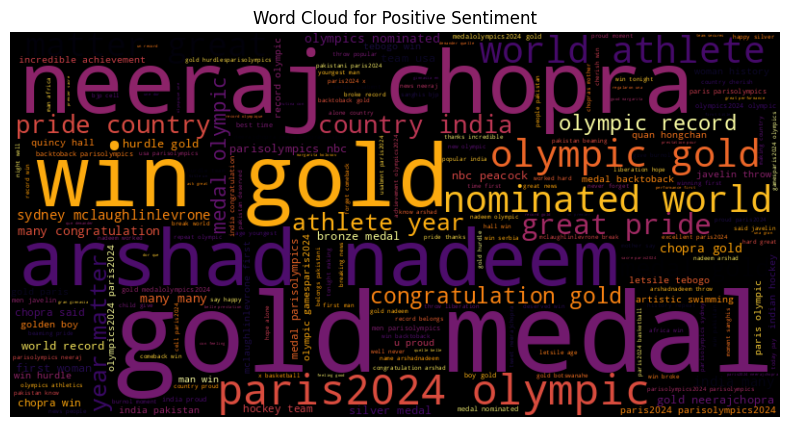

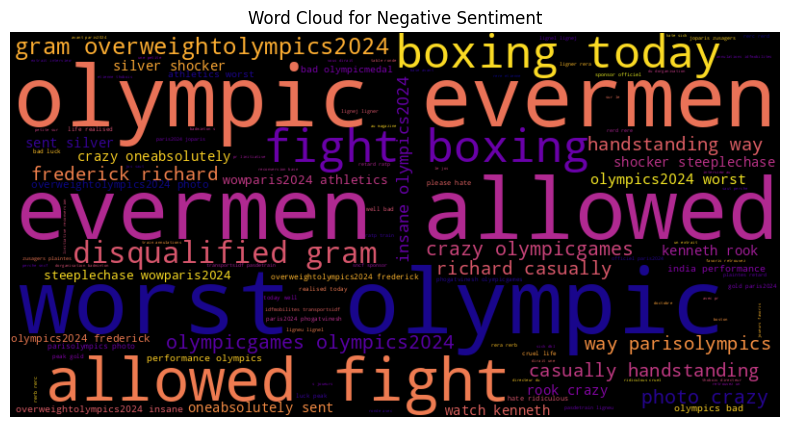

In [203]:
class OlympicSentimentAnalyzer:
    def __init__(self, df, n_keywords=10):
        self.df = df
        self.n_keywords = n_keywords
        self.strong_sentiments = None

    def preprocess(self):
        # Ensure the 'lemmatized_tweet' column is properly processed
        self.df['clean_tweet'] = self.df['lemmatized_tweet'].apply(lambda x: ' '.join(eval(x)))

    def convert_to_numeric(self):
        def convert_value(value):
            try:
                if isinstance(value, str):
                    if 'K' in value:
                        value = float(value.replace('K', '')) * 1e3
                    elif 'M' in value:
                        value = float(value.replace('M', '')) * 1e6
                return float(value)
            except ValueError:
                return None

        for column in ['Tweet_Number_of_Retweets', 'Tweet_Number_of_Likes', 'Tweet_Number_of_Looks']:
            self.df[column] = self.df[column].apply(convert_value)
            self.df[column] = pd.to_numeric(self.df[column], errors='coerce')

    def perform_sentiment_analysis(self):
        # Perform sentiment analysis using TextBlob
        self.df['sentiment'] = self.df['clean_tweet'].apply(lambda text: TextBlob(text).sentiment.polarity)

    def identify_strong_sentiments(self, threshold=0.5):
        # Identify tweets with strong positive or negative sentiment
        positive_tweets = self.df[self.df['sentiment'] > threshold]
        negative_tweets = self.df[self.df['sentiment'] < -threshold]
        self.strong_sentiments = {
            'positive': positive_tweets,
            'negative': negative_tweets
        }

    def plot_wordcloud(self, sentiment_type):
        if sentiment_type not in ['positive', 'negative']:
            raise ValueError("sentiment_type must be either 'positive' or 'negative'")

        text = ' '.join(self.strong_sentiments[sentiment_type]['clean_tweet'].tolist())

        if sentiment_type == 'positive':
            colormap = 'inferno'  # You can change this to any color map you like for positive sentiment
        else:
            colormap = 'plasma'  # Use a red color map for negative sentiment

        wordcloud = WordCloud(width=800, height=400, background_color='black', colormap=colormap).generate(text)
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title(f'Word Cloud for {sentiment_type.capitalize()} Sentiment')
        plt.axis('off')
        plt.show()

# Initialize
df = pd.read_csv('cleaned-sentiments.csv')

analyzer = OlympicSentimentAnalyzer(df)
analyzer.preprocess()
analyzer.convert_to_numeric()  # Convert engagement columns to numeric values
analyzer.perform_sentiment_analysis()
analyzer.identify_strong_sentiments()

# Generate word clouds for positive and negative sentiment tweets
analyzer.plot_wordcloud(sentiment_type='positive')  # Word cloud for positive sentiment tweets
analyzer.plot_wordcloud(sentiment_type='negative')  # Word cloud for negative sentiment tweets

## Most popular and engaging hashtags

In [204]:
class OlympicHashtagAnalyzer:
    def __init__(self, df):
        self.df = df
        self.hashtag_freq = None
        self.hashtag_impact = None
        self.hashtag_df = None

    def preprocess(self):
        # Ensure that 'Tweet_Content' column contains strings and handle NaN values
        self.df['clean_tweet'] = self.df['Tweet_Content'].astype(str).fillna('')

        # Extract hashtags from the 'Tweet_Content' column
        self.df['hashtags'] = self.df['clean_tweet'].apply(lambda x: [word for word in x.split() if word.startswith('#')])

        # Debug: Print some rows to verify hashtag extraction
        print("Sample extracted hashtags:")
        print(self.df[['clean_tweet', 'hashtags']].head())

    def convert_to_numeric(self):
        def convert_value(value):
            try:
                if isinstance(value, str):
                    if 'K' in value:
                        return float(value.replace('K', '')) * 1e3
                    elif 'M' in value:
                        return float(value.replace('M', '')) * 1e6
                    else:
                        return float(value)
                return value
            except ValueError:
                return None  # Return None if conversion fails

        for column in ['Tweet_Number_of_Retweets', 'Tweet_Number_of_Likes', 'Tweet_Number_of_Looks']:
            self.df[column] = self.df[column].apply(convert_value)
            self.df[column] = pd.to_numeric(self.df[column], errors='coerce')

    def analyze_hashtag_usage(self):
        # Flatten the list of hashtags and count the occurrences of each hashtag
        all_hashtags = [hashtag for hashtags in self.df['hashtags'] for hashtag in hashtags]
        self.hashtag_freq = pd.Series(all_hashtags).value_counts()

    def analyze_hashtag_impact(self):
        # Calculate average engagement metrics for each hashtag
        hashtag_data = []
        for index, row in self.df.iterrows():
            for hashtag in row['hashtags']:
                hashtag_data.append({
                    'hashtag': hashtag,
                    'retweets': row['Tweet_Number_of_Retweets'],
                    'likes': row['Tweet_Number_of_Likes'],
                    'looks': row['Tweet_Number_of_Looks']
                })

        hashtag_df = pd.DataFrame(hashtag_data)

        if not hashtag_df.empty:
            if 'hashtag' in hashtag_df.columns:
                self.hashtag_impact = hashtag_df.groupby('hashtag').mean()
            else:
                print("Error: 'hashtag' column is missing in the DataFrame.")
        else:
            print("Error: Hashtag DataFrame is empty. No hashtags were extracted.")

    def create_hashtag_summary_df(self):
        # Create a DataFrame that summarizes hashtag usage and impact
        self.hashtag_df = pd.DataFrame({
            'frequency': self.hashtag_freq,
            'avg_retweets': self.hashtag_impact['retweets'],
            'avg_likes': self.hashtag_impact['likes'],
            'avg_looks': self.hashtag_impact['looks']
        }).reset_index().rename(columns={'index': 'hashtag'}).sort_values(by='frequency', ascending=False)
        return self.hashtag_df

# Usage Example
df = pd.read_csv('cleaned-sentiments.csv')

analyzer = OlympicHashtagAnalyzer(df)
analyzer.preprocess()
analyzer.convert_to_numeric()  # Convert engagement columns to numeric values
analyzer.analyze_hashtag_usage()
analyzer.analyze_hashtag_impact()
hashtag_summary_df = analyzer.create_hashtag_summary_df()

# Display the DataFrame summarizing the hashtag analysis
print("Hashtag Summary DataFrame:")
hashtag_summary_df.head(10)

Sample extracted hashtags:
                                         clean_tweet  \
0   Olympic Legends. #USABMNT #Paris2024 #Basketball   
1  We've created footwear that not only feels inc...   
2  #OLYMPICRECORD FOR RIZKI JUNIANSYAH! @iwfnet |...   
3  Everyone is watching the ball. Except for him....   
4  Men's javelin throw final was BIG  92.97m OR A...   

                                            hashtags  
0                [#USABMNT, #Paris2024, #Basketball]  
1                                                 []  
2  [#OLYMPICRECORD, #Weightlifting, #Paris2024, #...  
3                                      [#Basketball]  
4                            [#Paris2024, #Olympics]  
Hashtag Summary DataFrame:


hashtag  frequency  avg_retweets     avg_likes     avg_looks
1321          #Paris2024      21109   1832.406815   7811.815753  1.580326e+06
1412      #ParisOlympics      12416   1336.650486   5204.788991  5.152909e+05
1201       #Olympics2024       8956    237.121338   1333.528454  6.559371e+04
1193           #Olympics       5889   1650.056697   6876.713380  1.185494e+06
1167       #OlympicGames       2859   1051.734193   4301.531635  6.544660e+05
2631       #olympics2024       2232     68.332342    268.124799  1.180513e+04
1085       #NeerajChopra       2140    422.829698   4197.619902  5.033718e+04
1432  #ParisOlympics2024       1509    113.543881   1254.811212  1.164597e+04
124        #ArshadNadeem       1489    279.671262   1257.762232  3.561826e+04
183          #Basketball       1489   3160.330345  17127.847782  3.529511e+06

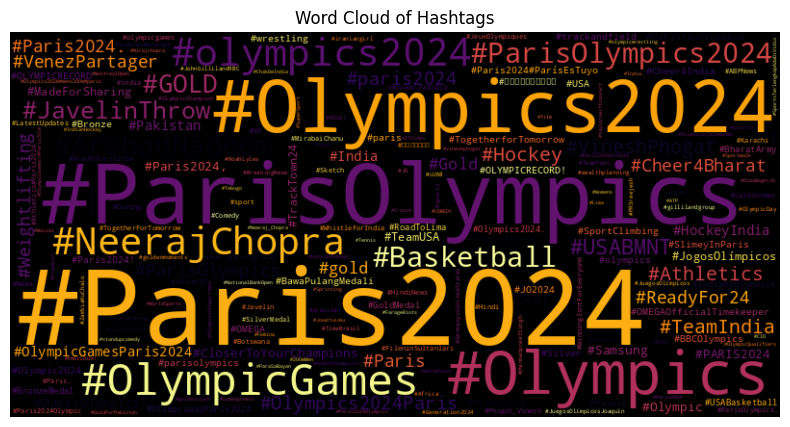

In [195]:
# Generate a word cloud for hashtags based on their frequency from the `hashtag_summary_df`
wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='inferno').generate_from_frequencies(hashtag_summary_df.set_index('hashtag')['frequency'].to_dict())

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear') # Remove colormap argument from here
plt.title('Word Cloud of Hashtags')
plt.axis('off')
plt.show()